# Игры — Анализ рекламных источников
### Задача**:**

Проанализировать поведения игроков в зависимости от источника перехода.

- Провести исследовательский анализ данных;
- Проанализировать влияние источника перехода в игру на поведение пользователя;
- Проверить статистические гипотезы
    1. *Проверьте гипотезу: время завершения уровня различается в зависимости способа прохождения:*
        - *через реализацию проекта,*
        - *через победу над первым игроком.*
    2. *Сформулировать собственную статистическую гипотезу. Дополнить её нулевой и альтернативной гипотезами. Проверить гипотезу с помощью статистического теста.*


### **Описание датасетов:**

Основной датасет содержит данные о событиях, совершенных в мобильной игре «Космические братья». В ней пользователи строят свою космическую программу и пытаются преуспеть в колонизации галактики.

Основная монетизация игры — только планируется. Предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки.

В датасете представлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока выполнения одного из двух условий:

- Победа над первым врагом
- Реализация проекта - разработка орбитальной сборки спутников

В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.

Датасет *game_actions.csv*:

- `event_datetime` — время события;
- `event` — одно из трёх событий:
    1. `building` — объект построен,
    2. `finished_stage_1` — первый уровень завершён,
    3. `project` — проект завершён;
- `building_type` — один из трёх типов здания:
    1. `assembly_shop` — сборочный цех,
    2. `spaceport` — космопорт,
    3. `research_center` — исследовательский центр;
- `user_id` — идентификатор пользователя;
- `project_type` — тип реализованного проекта;

Помимо основного датасета есть два датасета с информацией о рекламных активностях. 

Датасет *ad_cost.csv*:

- `day` - день, в который был совершен клик по объявлению
- `source` - источник трафика
- `cost` - стоимость кликов

Датасет user_source.csv содержит колонки:

- `user_id` - идентификатор пользователя
- `source` - источников, с которого пришёл пользователь, установивший приложение


1. Изучить общую информацию:

    Загрузить данные
    Сделать предварительные выводы

2. Предобработка данных:

    обработка пропусков, типов данных
    обработать дубликаты
    найти и исправить ошибки в данных

3. Исследовательский анализ данных:


    кол-во игроков за весь период
    кол-во событий за весь период
    кол-во игроков завершивших игру
    кол-во завершённых проектов
    кол-во постороеных зданий за весь период
    кол-во использованных источников трафика за весь период
    стоимость кликов для каждого источника трафика за весь период
    кол-во пользователей пришедших с каждого источника трафика
    время прохождения уровня

4. Расчет метрик:

    рассчитать DAU, WAU, sticky factor
    
    расчитать LTV - в планах показывать рекламу на экране постройки объекта
    
    расчитать CAC и ROMI
    
    
5. Проверка гипотез:


    время завершения уровня различается или нет в зависимости от способа прохождения:
    через реализацию проекта
    через победу над первым игроком.

    способ прохождения уровня зависит или не зависит от источника трафика
    возврат игроков в игру зависит или не зависит от источника трафика

5. Выводы

6. Предложения


## Материалы
 Презентация (https://drive.google.com/file/d/1ZD71W7veDf0Lt_79GbcDrqKsf_nULNzg/view?usp=sharing)

# 1 Загрузка данных

In [827]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st



# для отображения одного знака после запятой
pd.options.display.float_format = '{:,.1f}'.format
plt.rcParams["figure.dpi"] = 150

In [828]:
actions = pd.read_csv('game_actions.csv')
display(actions.head())
actions.info()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


В таблице `actions`:

* перевести данные столбца с датой в корректный тип,
* выяснить причины появления пропусков и их заполнение.

In [829]:
ad_costs = pd.read_csv('ad_costs.csv')
display(ad_costs.head())
ad_costs.info()

,source,day,cost
0,facebook_ads,2020-05-03,935.9
1,facebook_ads,2020-05-04,548.4
2,facebook_ads,2020-05-05,260.2
3,facebook_ads,2020-05-06,178.0
4,facebook_ads,2020-05-07,111.8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


Нужно изменить тип данных в столбце с датой и поменять название столбца

In [830]:
user_source = pd.read_csv('user_source.csv')
display(user_source.head())
user_source.info()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


Действий по таблице не требуется.

### Предварительный вывод:
В таблице `actions`:
* перевести данные столбца с датой в корректный тип,
* выяснить причины появления пропусков в колонках`building_type` и `project_type`

В таблице `ad_costs`:
* изменить тип данных в столбце с датой и поменять название столбца

В таблице `user_source`:
* данные действий не требуют

# Подготовим данные

## Корректировка даты

In [831]:
# приводим колонку day к типу даннух date
ad_costs['day'] = pd.to_datetime(ad_costs['day'])

# приводим колонку day к типу даннух date
actions['event_datetime'] = pd.to_datetime(actions['event_datetime'])

In [832]:
# переименуем столбец day в date
ad_costs.rename(
    columns={"day": "date"},
    errors="raise",
    inplace=True
)
ad_costs.head()

,source,date,cost
0,facebook_ads,2020-05-03,935.9
1,facebook_ads,2020-05-04,548.4
2,facebook_ads,2020-05-05,260.2
3,facebook_ads,2020-05-06,178.0
4,facebook_ads,2020-05-07,111.8


## Проверка пропусков

In [833]:
# проверим пропуски
actions['building_type'].isna().sum()

7683

In [834]:
# посмотрим в каких столбцах пропуски
actions[actions['building_type'].isna()]['event'].value_counts()

finished_stage_1    5817
project             1866
Name: event, dtype: int64

In [835]:
actions['event'].value_counts()

building            127957
finished_stage_1      5817
project               1866
Name: event, dtype: int64

Пропущеные значения в `building_type` скорее всего из-за того, что игрок завершил игру. не будем заполнять пропуски

In [836]:
# проверим значения колонки project_type
actions['project_type'].unique()

array([nan, 'satellite_orbital_assembly'], dtype=object)

Пропуски в столбце `project_type` - наверно игрок только начал игру и не успел начать игровые проекты. не будем заполнять пропуски

### Предварительный вывод:
* Пропущеные значения в `building_type` скорее всего из-за того, что игрок завершил игру. не будем заполнять пропуски
* Пропуски в столбце `project_type` - наверно игрок только начал игру и не успел начать игровые проекты. не будем заполнять пропуски

## Обработка дубликатов

In [837]:
# проверяем  на дубликаты
actions[actions.duplicated()]

,event_datetime,event,building_type,user_id,project_type
74891,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN


In [838]:
# проверим кол-во дублей
actions.duplicated().sum()

1

In [839]:
# выведим дубликаты
actions[(actions['event'] == 'building') & (actions['event_datetime'] == '2020-05-10 18:41:56')]

,event_datetime,event,building_type,user_id,project_type
74890,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN
74891,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN


In [840]:
# удалим 
actions = actions.drop_duplicates()

# проверяем удаление дублей
actions.duplicated().sum()

0

### Предварительный вывод:
* Дубликаты обработаны

## Посмотрим и исправим ошибки в данных

In [841]:
# проверим данные - на вероятность того, что  игрок мог сыграть более 1 раза
(actions[actions['event'] != 'building']
 .groupby(['user_id', 'event'])
 .agg({'event':'count'})
 .rename(columns={'event':'count'}).sort_values(by='count'))

,,count
user_id,event,
001d39dc-366c-4021-9604-6a3b9ff01e25,finished_stage_1,1
a9ff93bd-0b96-4e89-bef7-c29326643faf,finished_stage_1,1
a9fdac24-7f99-4c08-a4cd-32aaa4f45891,finished_stage_1,1
a9f014cc-fa01-475c-9002-a9dad7d2a1f9,finished_stage_1,1
a9c72aaf-a840-4871-8dd5-bf6f0dc42dee,project,1
...,...,...
52f1231a-50bc-49ad-aa1c-43355c6e9872,finished_stage_1,1
52c8f5fe-6d2b-495a-8985-d58941089fb9,finished_stage_1,1
52c654b7-2af1-41c9-98c4-1d657c263aa9,finished_stage_1,1


### Предварительный вывод:
* Ошибки в данных не обнаружены

# Исследовательский анализ данных:

## Кол-во игроков за весь период

In [842]:
print("Кол-во пользователей, установивших игру: {} шт.".format(user_source.user_id.nunique()))
print("Кол-во пользователей, начавших играть: {} шт.".format(actions.user_id.nunique()))

Кол-во пользователей, установивших игру: 13576 шт.
Кол-во пользователей, начавших играть: 13576 шт.


## Кол-во событий за весь период

In [904]:
actions.head()

,event_datetime,event,building_type,user_id,project_type,session_week,session_date,profit,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,19,2020-05-04,0.1,youtube_channel_reklama
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,19,2020-05-05,0.1,youtube_channel_reklama
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,19,2020-05-05,0.1,youtube_channel_reklama
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,19,2020-05-05,0.1,youtube_channel_reklama
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,19,2020-05-06,0.1,youtube_channel_reklama


In [844]:
event_ = actions['event'].count()
print('Количество событий за весь период:', event_)

Количество событий за весь период: 135639


In [845]:
# посмотрим какие события есть в столбце event
actions['event'].unique()

array(['building', 'finished_stage_1', 'project'], dtype=object)

In [846]:
# посчитаем сколько игроков в каждом событии
events = actions.groupby('event').agg({'user_id':'count'}).reset_index().rename(columns={'building_type':'count'})
events

,event,user_id
0,building,127956
1,finished_stage_1,5817
2,project,1866


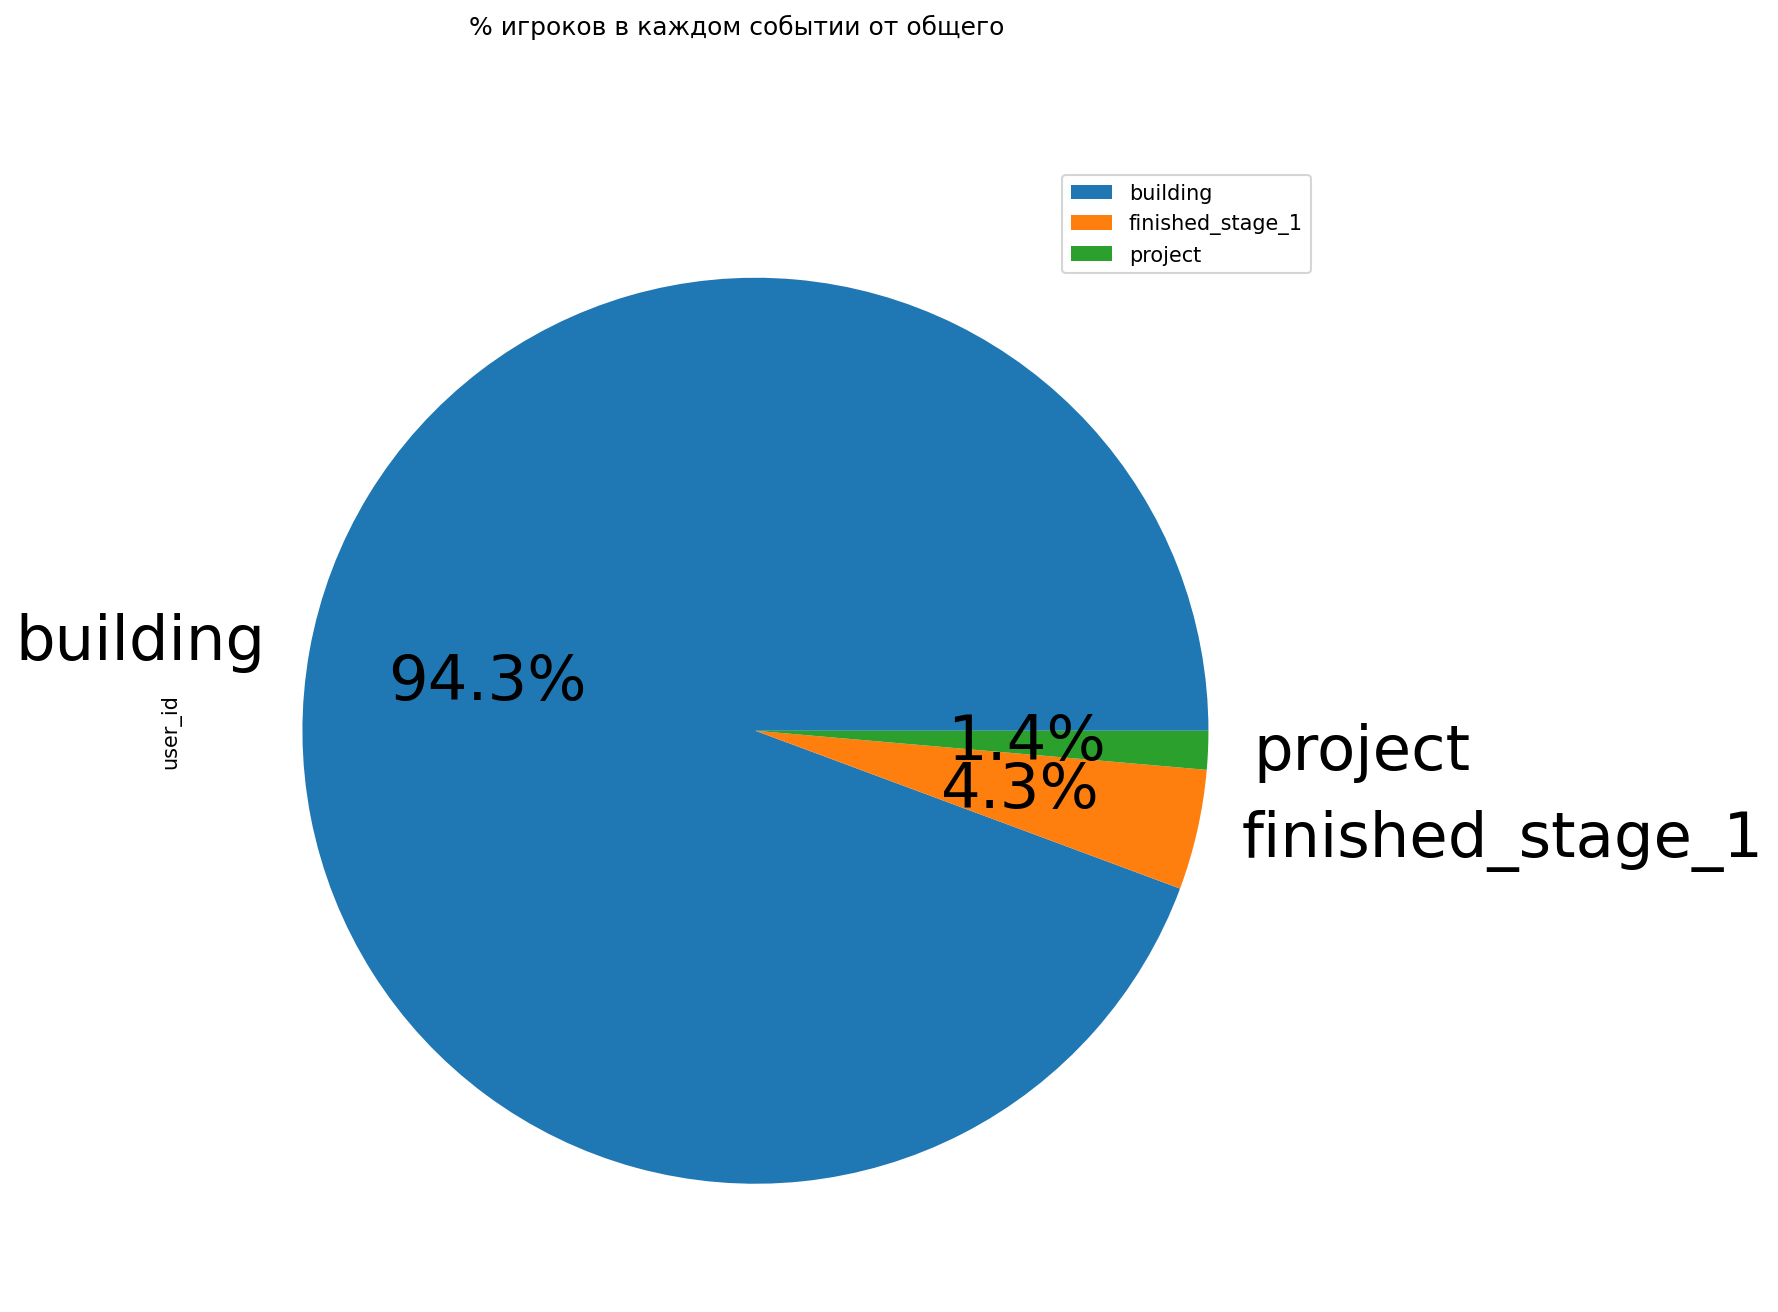

In [847]:
events.set_index('event').plot.pie(autopct="%.1f%%", subplots = True, figsize=(10, 10), 
                                   title='% игроков в каждом событии от общего', fontsize=30)
plt.show()

## Кол-во игроков завершивших игру

In [848]:
# сгруппируем по событию
gr_event = actions.groupby(['event']).agg({'user_id':'nunique'})
# создадим переменную с игроками прошедшими уровень
finish_game = gr_event.loc['finished_stage_1', 'user_id']
# разделим игроков на пошедших уровень и нет
users_game = pd.DataFrame({'users': ['finish', 'not finish', 'total'],
                           'count': [finish_game,
                                     actions['user_id'].nunique() - finish_game,
                                     actions['user_id'].nunique()]})
# посмотрим результат
users_game

,users,count
0,finish,5817
1,not finish,7759
2,total,13576


In [900]:

def graph(data, x, y, title, text):
    fig = px.bar(data, x=x, y=y, title=title, text=text)
    fig.show()
# построим график
graph(users_game, 'users', 'count', 'Кол-во игроков завершивших игру ', 'count')

users_game.loc[:]

,users,count
0,finish,5817
1,not finish,7759
2,total,13576


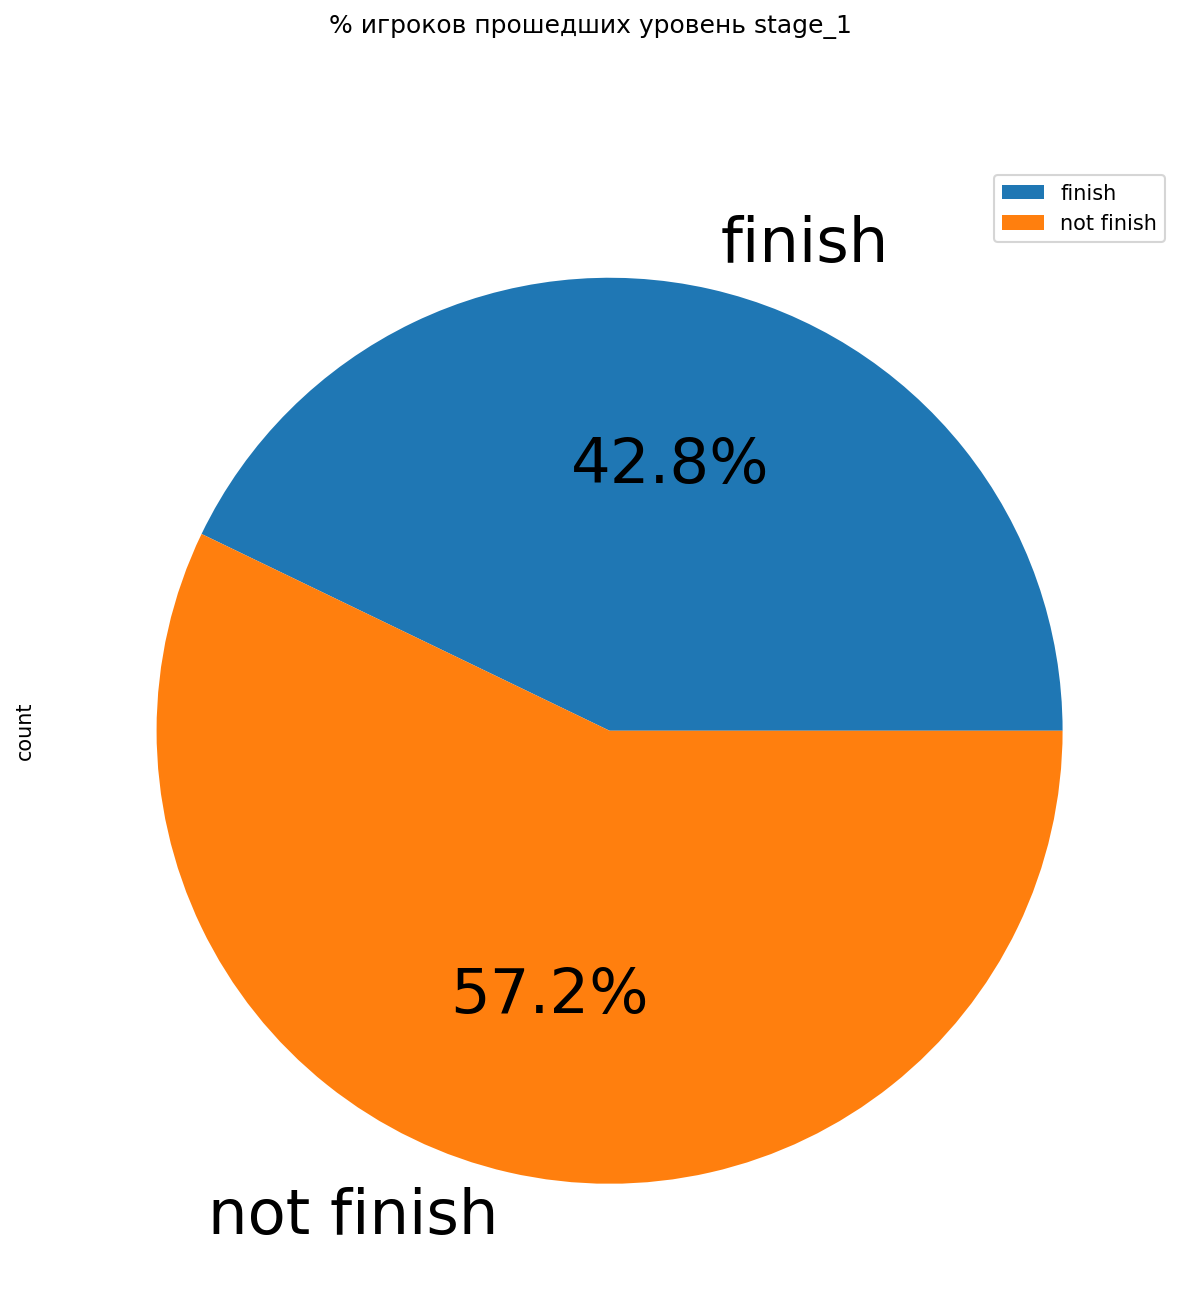

In [850]:
# построим наглядную диаграмму в процентах
users_game.iloc[:2].set_index('users').plot.pie(autopct="%.1f%%", subplots = True, figsize=(10, 10),
                                                title='% игроков прошедших уровень stage_1', fontsize=30)
plt.show()

* % игроков прошедших уровень stage_1 - 42,8 %
* не прошли уровень - 57,2 %

## Кол-во завершённых проектов

In [851]:
print('Кол-во завершённых проектов: {} шт.'.
      format(actions[actions['project_type'] == 'satellite_orbital_assembly']['user_id'].nunique()))

Кол-во завершённых проектов: 1866 шт.


In [852]:
# создадим переменную с проектами
projects = (actions[actions['event'] != 'building']
            .groupby('event')
            .agg({'user_id':'count'})
            .reset_index()
            .rename(columns={'user_id':'count'}))
# создадим переменную с игроками - победа над врагом
victory = (projects[projects['event'] == 'finished_stage_1']['count'][0] -
                projects[projects['event'] == 'project']['count'][1])

projects = pd.concat([projects, pd.DataFrame({'event':['victory'], 'count':victory})])

projects

,event,count
0,finished_stage_1,5817
1,project,1866
0,victory,3951


In [901]:
# построим график
graph(projects, 'event', 'count', 'Кол-во завершённых проектов ', 'count')

projects.loc[:]

,event,count
0,finished_stage_1,5817
1,project,1866
0,victory,3951


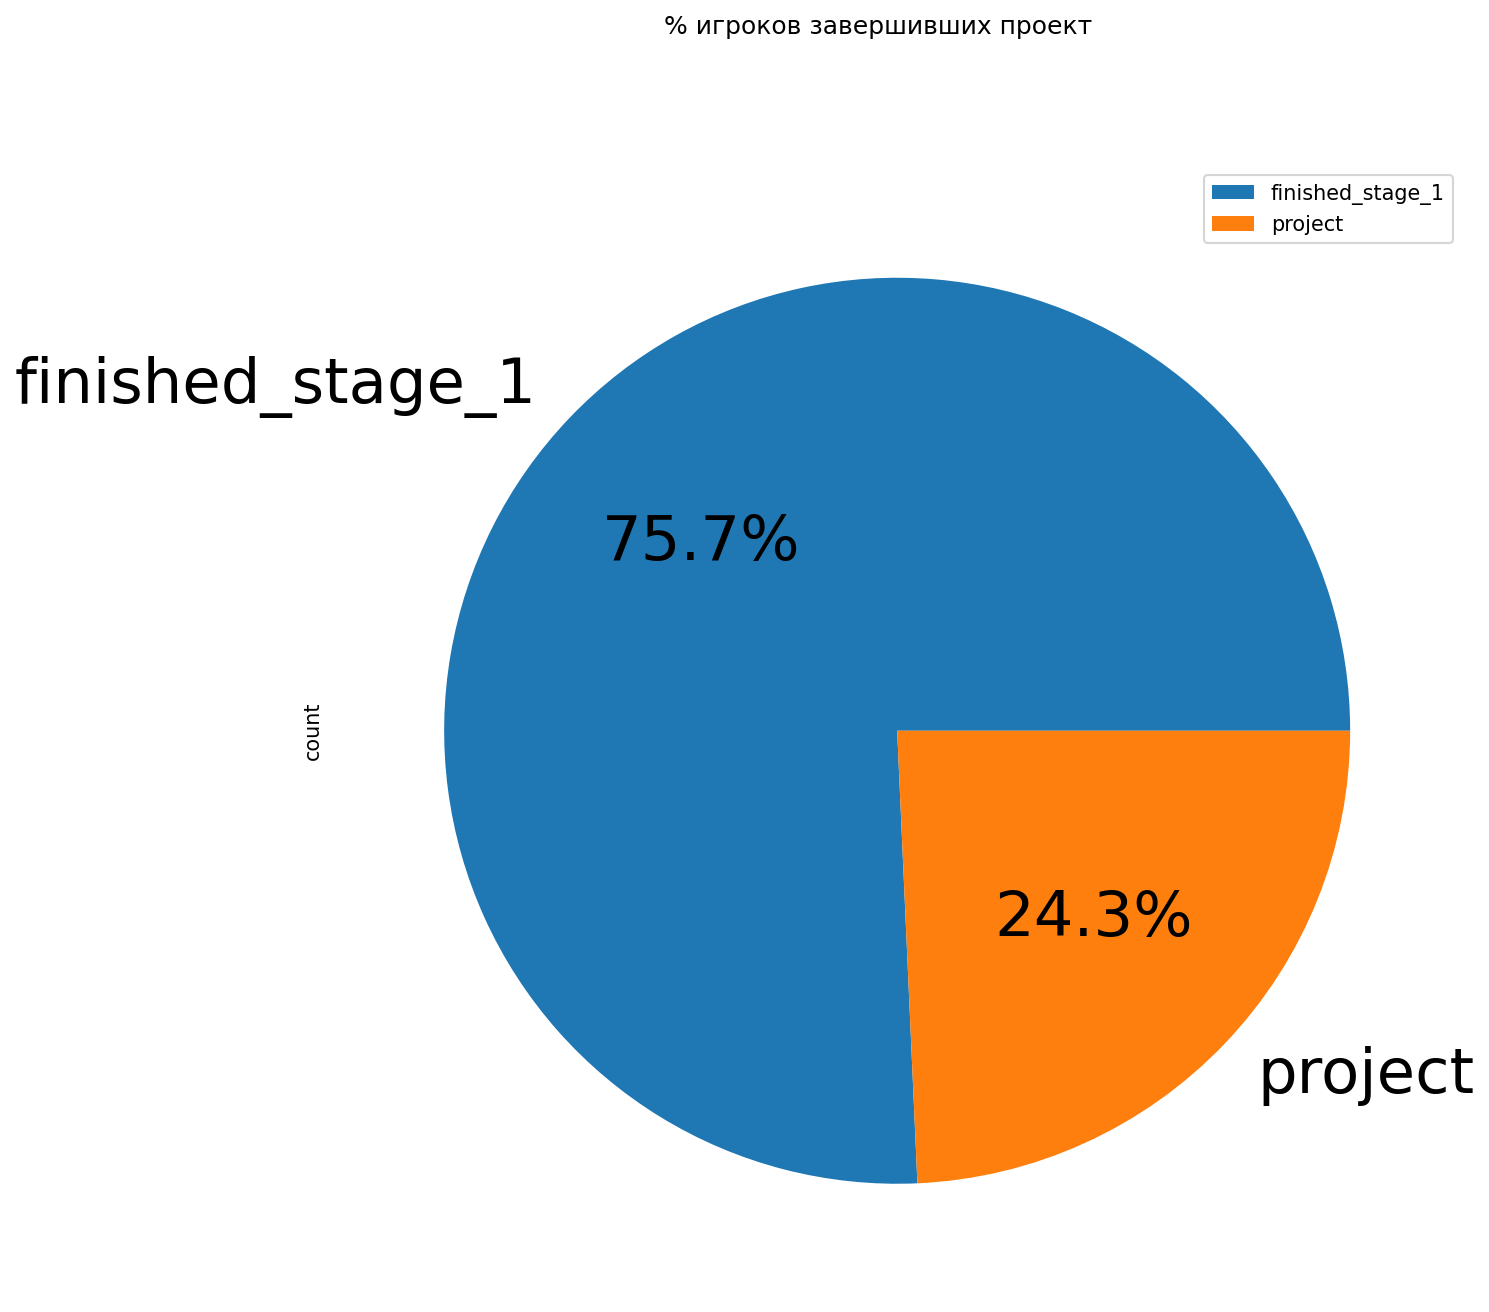

,event,count
0,finished_stage_1,5817
1,project,1866
0,victory,3951


In [854]:
# построим наглядную диаграмму в процентах
projects.iloc[:2].set_index('event').plot.pie(autopct="%.1f%%", subplots = True, figsize=(10, 10),
                                              title='% игроков завершивших проект', fontsize=30)
plt.show()
projects.loc[:]

Большая часть игроков завершила уровень с помощью победы над врагом, а не через реализацию проекта

## Кол-во постороеных зданий за весь период

In [855]:
print('Кол-во постороенных зданий за весь период: {}' 
      .format(actions[actions['building_type'] != 'no_buildings']['building_type'].count()))

Кол-во постороенных зданий за весь период: 127956


In [902]:
# создадим переменную с объектами
objects = (actions[actions['building_type'] != 'no_buildings']
          .groupby('building_type')
          .agg({'event':'count'})
          .reset_index()
          .rename(columns={'event':'count'}))
# построим график
graph(objects, 'building_type', 'count', 'Построенные здания', 'count')

objects.loc[:]

,building_type,count
0,assembly_shop,54494
1,research_center,14137
2,spaceport,59325


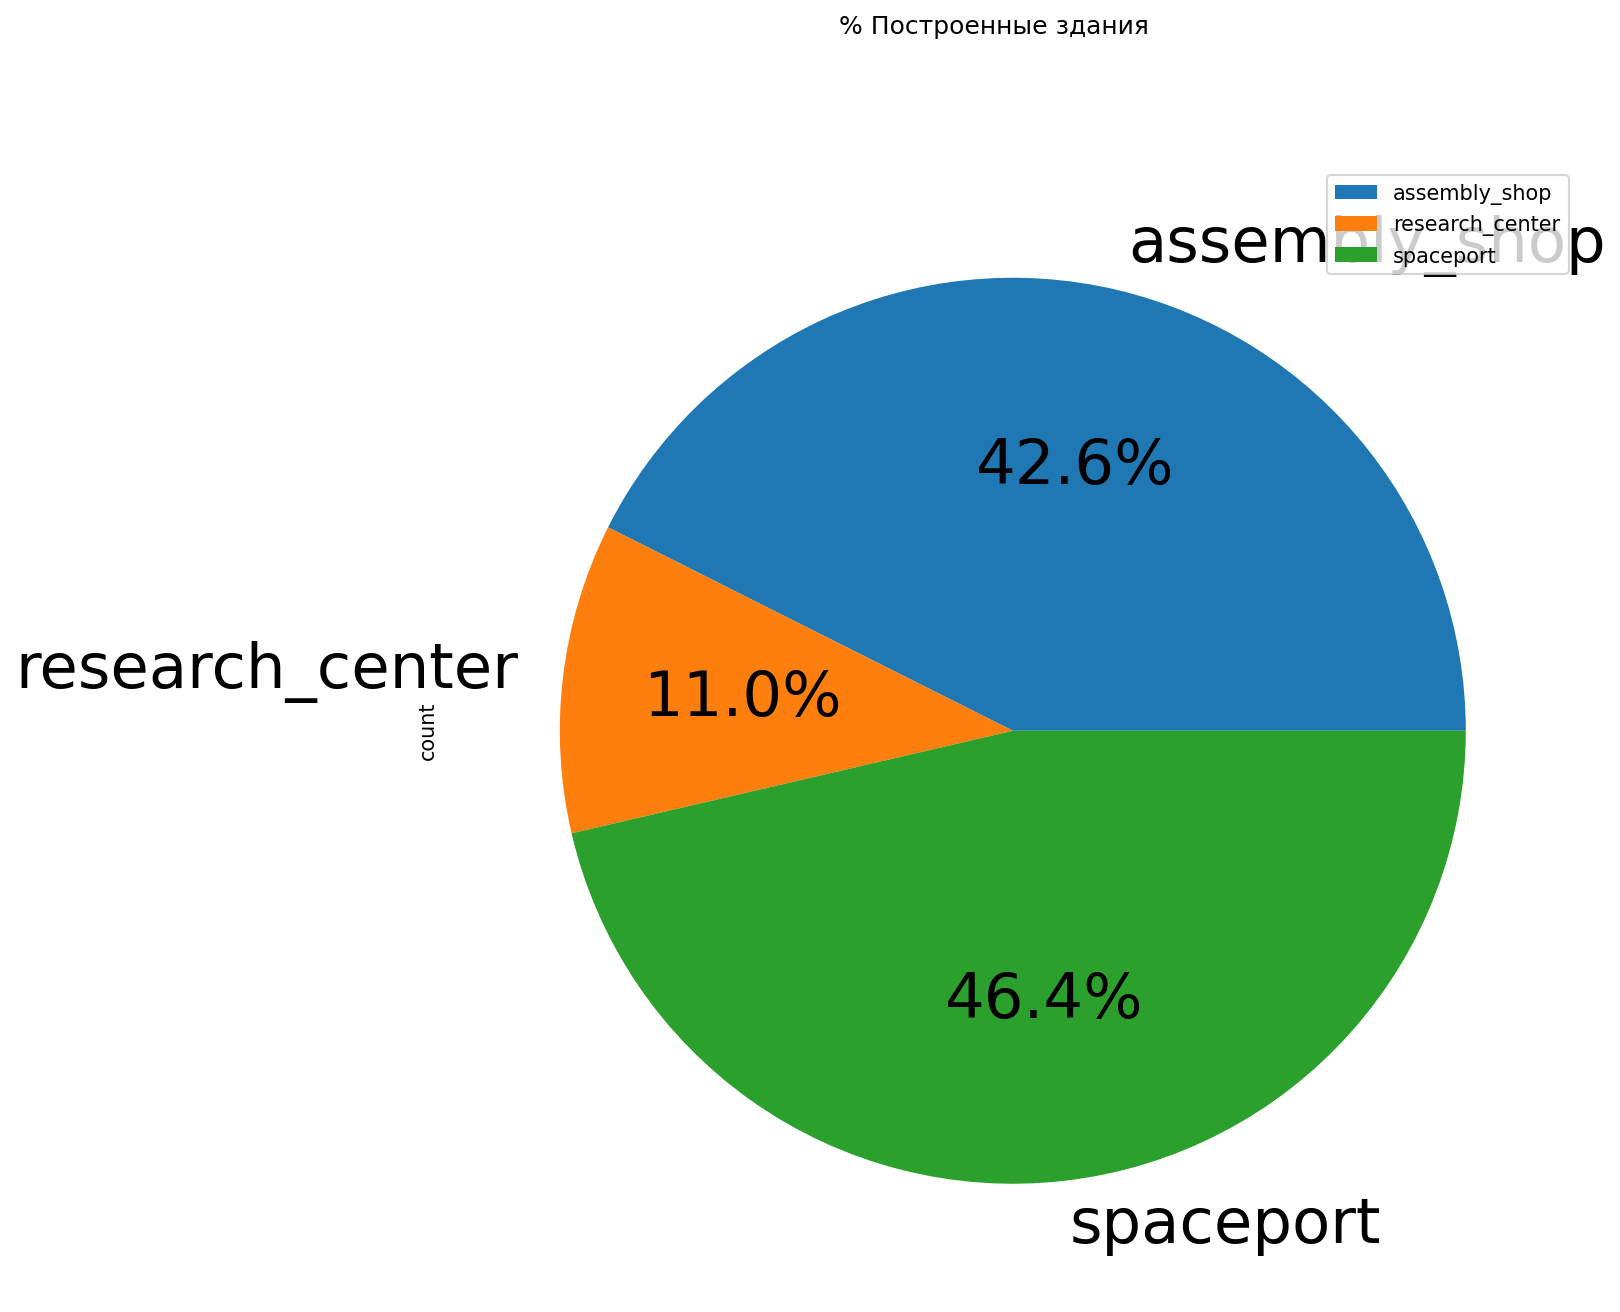

,building_type,count
0,assembly_shop,54494
1,research_center,14137
2,spaceport,59325


In [857]:
# построим наглядную диаграмму в процентах
objects.iloc[:3].set_index('building_type').plot.pie(autopct="%.1f%%", subplots = True, figsize=(10, 10),
                                              title='% Построенные здания', fontsize=30)
plt.show()
objects.loc[:]

Кол-во постороенных зданий за весь период 127956 шт.:
* космодром 59325 шт. (46,4 %)
* сборочный цех 54494 шт. (42,6 %)
* исследовательский центр 14137 шт. (11 %)

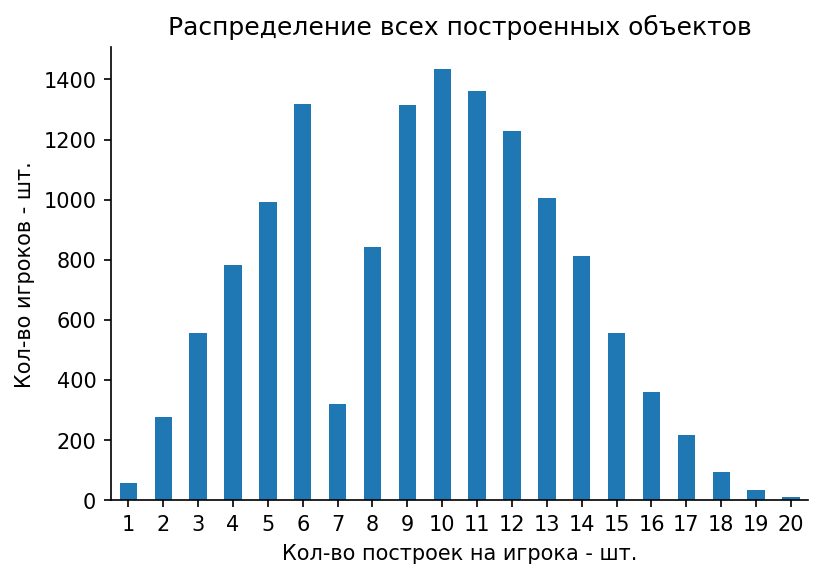

In [858]:
# посмотрим на распределение построенных объектов
actions.groupby('user_id')['building_type'].count().value_counts().sort_index().plot.bar(rot=0)
sns.despine()
plt.title('Распределение всех построенных объектов')
plt.xlabel('Кол-во построек на игрока - шт.')
plt.ylabel('Кол-во игроков - шт.')
plt.show()

* Возможно предположить, те игроки, кто не прошёл уровень - ушли из игры. Так как интерес снизился после 6 постройки.  

## Кол-во использованных источников трафика за весь период

In [859]:
# создадим словарь рекламных источников, для визуализации
ad_source_dict = {
    "facebook_ads": "Facebook",
    "instagram_new_adverts": "Instagram",
    "yandex_direct": "Yandex",
    "youtube_channel_reklama": "Youtube",
    
}
    



# всего источников
print('Кол-во использованных источников трафика за весь период: {}'
      .format(ad_costs['source'].nunique()))

print('Источники:')
for event in ad_costs['source'].unique().tolist():
    print('{}'.format(event))

Кол-во использованных источников трафика за весь период: 4
Источники:
facebook_ads
instagram_new_adverts
yandex_direct
youtube_channel_reklama


## Стоимость кликов для каждого источника трафика за весь период

In [860]:
ads = (ad_costs
       .groupby('source')
       .agg({'cost':'sum'})
       .reset_index()
       .rename(columns={'cost':'count'})
       .round({'count': 2}))

graph(ads, 'source', 'count', 'Стоимость кликов за весь период, по источникам трафика', 'count')

Стоимость кликов для каждого источника трафика за весь период:

    -  yandex 2233.11 y.e.
    –  instagram 2161.44 y.e.
    -  facebook 2140.9 y.e.
    -  youtube 1068.12 y.e.


## Кол-во пользователей пришедших с каждого источника трафика

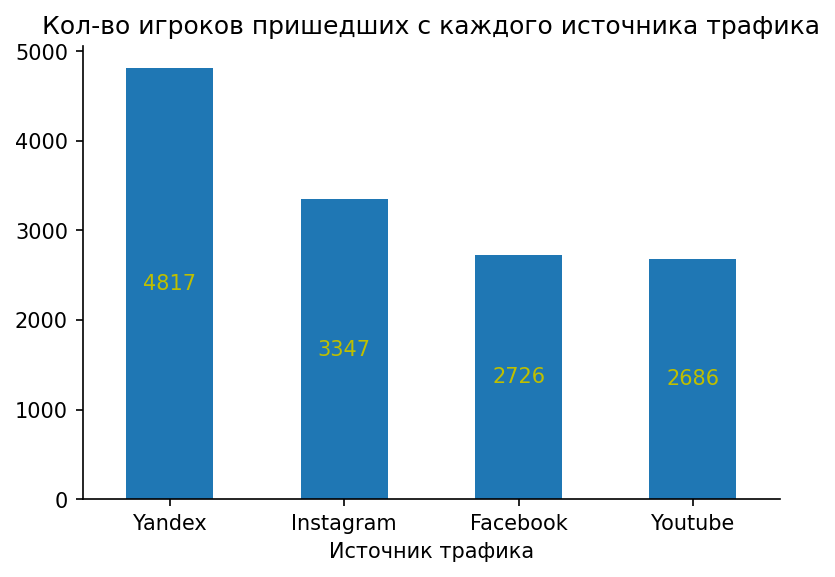

,user_id
source,
facebook_ads,2726
instagram_new_adverts,3347
yandex_direct,4817
youtube_channel_reklama,2686


In [861]:
# источники трафика игроков 
ad_efficiency = user_source.groupby('source')['user_id'].count().to_frame()
ad_efficiency

# график
ax = ad_efficiency.sort_values('user_id', ascending=False).plot.bar(y='user_id', legend=False)
plt.title('Кол-во игроков пришедших с каждого источника трафика')
plt.ylabel('')
plt.xlabel('Источник трафика')
plt.gca().set_xticklabels(
    [ad_source_dict[x] for x in ad_efficiency.sort_values('user_id', ascending=False).index],
    rotation=0
)

for i, value in enumerate(ad_efficiency.sort_values('user_id', ascending=False).iterrows()):
    ax.text(
        i, value[1]['user_id']/2,
        '{:.0f}'.format(value[1]['user_id']),
        ha='center', va='center', color='y'
    )
sns.despine()
plt.show()
ad_efficiency.loc[:]

Больше всего игроков пришло из:
* yandex (4817)
* instagram (3347)
* третье место у  источников youtube и facebook по (2700)

## Время прохождения уровня

In [862]:
# переменная с игроками прошедшими уровень
user_time = actions[actions['event'] == 'finished_stage_1']['user_id']
# группируем по user_id
level_passed = (actions
                .query('user_id in @user_time')
                .groupby('user_id')
                .agg({'event_datetime':['min','max']}))
# переменная для столбца расчёта времени прохождения уровня              
level_passed['level_passed'] = level_passed[('event_datetime', 'max')] - level_passed[('event_datetime', 'min')]
# вставляем новый столбец level_passed
level_passed.columns = level_passed.columns.droplevel(1)

level_passed = level_passed.reset_index().sort_values(by='level_passed')
# смотрим, что получилось
level_passed.head()              

,user_id,event_datetime,event_datetime,level_passed
91,03990bc0-47b6-44ce-9f8b-3afb1a97d0e7,2020-05-07 16:40:32,2020-05-08 02:19:33,0 days 09:39:01
4687,ced7b368-818f-48f6-9461-2346de0892c5,2020-05-04 00:13:21,2020-05-04 19:47:29,0 days 19:34:08
4547,c8180f71-68dc-4fd5-ba6e-ba5f5d0d28f7,2020-05-08 16:08:29,2020-05-09 11:52:33,0 days 19:44:04
825,2204ae7f-892b-494d-bd58-28816ff35eb5,2020-05-07 02:25:27,2020-05-08 01:02:51,0 days 22:37:24
1032,2ab1cc5a-413a-408e-ba76-01de8e12bead,2020-05-05 13:25:04,2020-05-06 13:43:12,1 days 00:18:08


In [863]:
# посмотрим выборку
print('Время прохождения уровня:' +
      '\n''Самое быстрое  - {}'.format(level_passed['level_passed'].min()) +
      '\n''Самое долгое  - {}'.format(level_passed['level_passed'].max()) +
      '\n''В среднем - {}'.format(level_passed['level_passed'].mean()) +
      '\n''По медиане - {}'.format(level_passed['level_passed'].median()))

Время прохождения уровня:
Самое быстрое  - 0 days 09:39:01
Самое долгое  - 30 days 21:58:53
В среднем - 11 days 20:37:59.561801616
По медиане - 11 days 13:28:44


* Самый быстрый игрок сумел завершить игру за 09:39:01
* Самое долгое  - 30 days 21:58:53
* В среднем игроки проходили уровень за 11 дней.

### Предварительный вывод:

* Количество событий за весь период: 135639
* `building` постройки совершили 127956 игроков (94,3 %)
* `finished_stage_1` прошли 1 уровень 5817 игроков (4,3 %)
* `project` игровой проект сделали 1866 игроков (1,04 %)


* % игроков прошедших уровень stage_1 - 42,8 %
* не прошли уровень - 57,2 %


* Кол-во завершённых проектов: 1866 шт (24,3 %)
* Большая часть игроков завершила уровень с помощью победы над врагом (75,7 %), а не через реализацию проекта


* Кол-во постороенных зданий за весь период 127956 шт.:
    - космодром 59325 шт. (46,4 %)
    - сборочный цех 54494 шт. (42,6 %)
    - исследовательский центр 14137 шт. (11 %)
    

* Возможно предположить, те игроки, кто не прошёл уровень - ушли из игры. Так как интерес снизился после 6 постройки.    
    

* Кол-во использованных источников трафика за весь период - 4


* Стоимость кликов для каждого источника трафика за весь период:
    
    -  yandex   2233.11 y.e.
    - instagram 2161.44 y.e.
    -  facebook 2140.9 y.e.
    -  youtube  1068.12 y.e.


* Кол-во пользователей пришедших с каждого источника трафика:
    -  yandex   4817
    - instagram 3347
    -  facebook 2726
    -  youtube  2686
    
    
* Самый быстрый игрок сумел завершить игру за 09:39:01
* Самое долгое  - 30 days 21:58:53
* В среднем игроки проходили уровень за 11 дней.    

# Расчет метрик:

## расчёт DAU, WAU, sticky factor

In [864]:
# добавим для расчёта столбцы с неделей и днем
actions['session_week']  = actions['event_datetime'].dt.week
actions['session_date'] = actions['event_datetime'].dt.date

/var/folders/g_/tjm9p_f91z38v0_cxgkx50f80000gn/T/ipykernel_20878/469015413.py:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



In [865]:
# рассчитаем dau, wau, sticky_wau
dau_total = actions.groupby('session_date').agg({'user_id': 'nunique'}).mean()
wau_total = actions.groupby('session_week').agg({'user_id': 'nunique'}).mean()
sticky_wau = dau_total / wau_total

print('\033[1m' + 'DAU - ' + '\033[0m' + '{:.2f}'.format(dau_total[0]) +
      '\n' + '\033[1m' + 'WAU - ' + '\033[0m' + '{:.2f}'.format(wau_total[0]) +
      '\n' + '\033[1m' + 'Sticky factor - ' + '\033[0m' + '{:.2%}'.format(sticky_wau[0]))

DAU - 2884.88
WAU - 6120.00
Sticky factor - 47.14%


* каждый день заходит в игру  2884.88 игроков 
* в неделю 6120 
* возвращается в игру 47.14% это хороший показатель

<Figure size 2400x750 with 0 Axes>

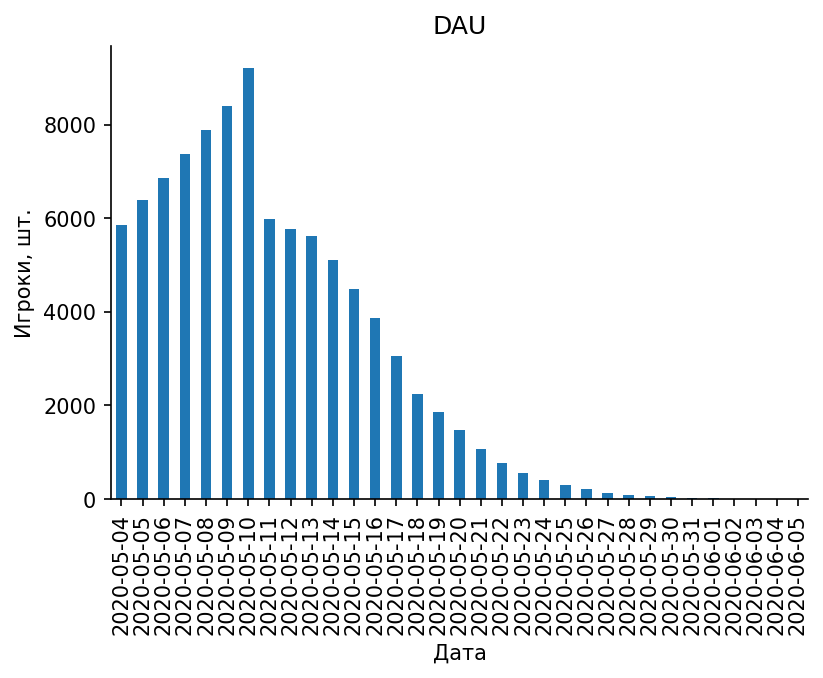

In [866]:
# датафрейм
actions_dau = actions.groupby('session_date').agg({'user_id': 'nunique'})

# график
plt.figure(figsize = (16,5))
actions_dau.plot.bar(legend=False)
plt.title('DAU')
plt.ylabel('Игроки, шт.')
plt.xlabel('Дата')
sns.despine()
plt.show()

* рост числа игроков наблюдаем в первые 7 дней
* на 7 день - пик кол-ва игроков, чуть меньше 10 тыс

<Figure size 2400x750 with 0 Axes>

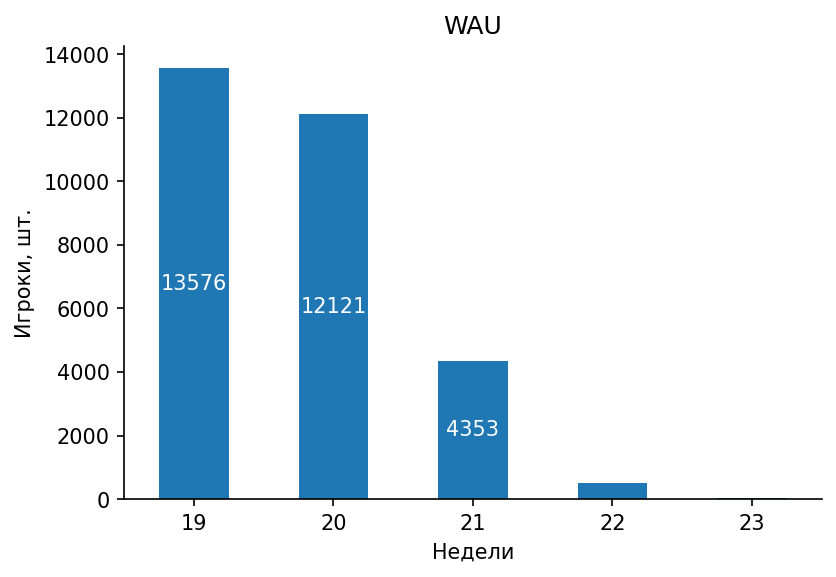

In [867]:
# датафрейм
actions_wau = actions.groupby('session_week').agg({'user_id': 'nunique'})

# график
plt.figure(figsize = (16,5))
actions_wau.plot.bar(rot=0, legend=False)
plt.title('WAU')
plt.ylabel('Игроки, шт.')
plt.xlabel('Недели')


for i, value in enumerate(actions_wau.iterrows()):
    if value[1]['user_id'] < 1000:
        pass
    else:
        plt.gca().text(
            i, value[1]['user_id']/2,
            '{:.0f}'.format(value[1]['user_id']),
            ha='center', va='center', color='white'
        )
    
sns.despine()
plt.show()

* Видим в первую неделю игроков много 13,5 тыс.
* Во вторую неделю игра  держит в районе 12 тысяч игроков
* На третью неделю начало большого оттока игроков - резкое снижение в три раза

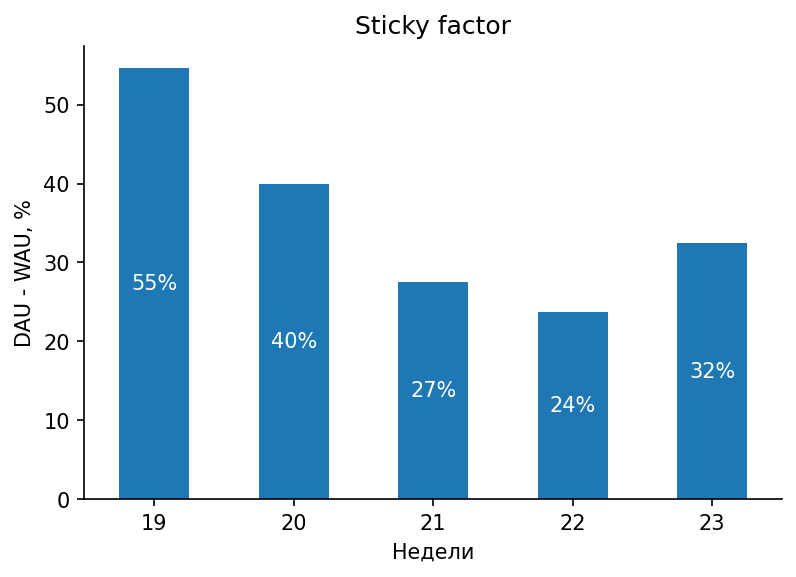

In [868]:
# датафрейм
sticky_factor = ((actions.groupby(['session_week', 'session_date']).agg({'user_id': 'nunique'}).reset_index()).
                    groupby(['session_week']).agg({'user_id': 'mean'}) / actions_wau) * 100
sticky_factor.plot.bar(legend=False, rot=0)

# график
plt.title('Sticky factor')
plt.xlabel('Недели')
plt.ylabel('DAU - WAU, %')

for i, value in enumerate(sticky_factor.iterrows()):
    plt.gca().text(
        i, value[1]['user_id']/2,
        '{:.0f}%'.format(value[1]['user_id']),
        ha='center', va='center', color='white'
    )

sns.despine()
plt.show()

* Sticky factor DAU/WAU в первую неделю превышает 50 %
* К четвертой неделе снижается до 24 %
* Возрастание DAU/WAU на пятой неделе, скорее всего большое влияние оказывают малые абсолютные значения  

## Расчёт LTV - в планах показывать рекламу на экране постройки объекта

In [869]:
# для рассчета предположим, что каждый показ рекламы нам приносит -  0.05 у.е.
def add_cost(data):
    if data == 'building':
        return .05
    else:
        return 0

# добавляем в данные столбец с profit
actions['profit'] = actions['event'].apply(add_cost)

# объединим данные
actions = pd.merge(actions, user_source, on='user_id')

# получаем таблицу с user_id, event_datetime, profit
orders = actions[['source', 'user_id', 'event_datetime', 'profit']].copy()

# оставим в df только данные с 'покупками'
orders = orders[orders['profit'] > 0]
# получаем день 'заказа'
orders['order_day'] = orders['event_datetime'].astype('datetime64[D]')
# переименуем столбец в id
orders = orders.rename(columns={'user_id':'id'})

orders.head()

,source,id,event_datetime,profit,order_day
0,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-04 00:00:01,0.1,2020-05-04
1,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-05 05:20:15,0.1,2020-05-05
2,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-05 19:24:02,0.1,2020-05-05
3,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-05 20:59:19,0.1,2020-05-05
4,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-06 00:52:56,0.1,2020-05-06


In [870]:
# переменная - день первой покупки каждого игрока
first_purchase = orders.groupby(['source', 'id']).agg({'order_day': 'min'}).reset_index()
first_purchase.columns = ['source', 'id', 'first_order_day']
first_purchase.head()

,source,id,first_order_day
0,facebook_ads,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06
1,facebook_ads,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05
2,facebook_ads,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-04
3,facebook_ads,00440efd-aa50-4b4b-aae8-ffcd1782729d,2020-05-04
4,facebook_ads,00965328-5e54-453f-b11b-52f8ae9ae80b,2020-05-07


In [871]:
# считаем кол-во новых покупателей по дням
cohort_sizes = (
    first_purchase.groupby(['source', 'first_order_day'])
    .agg({'id': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['source', 'first_order_day', 'new_purchase']
cohort_sizes.head()

,source,first_order_day,new_purchase
0,facebook_ads,2020-05-04,1184
1,facebook_ads,2020-05-05,694
2,facebook_ads,2020-05-06,345
3,facebook_ads,2020-05-07,224
4,facebook_ads,2020-05-08,139


In [872]:
# добавим день первой покупки каждого игрока в  new таблицу
new_orders = pd.merge(orders,first_purchase, on=['id', 'source'])
new_orders.head(-5)

,source,id,event_datetime,profit,order_day,first_order_day
0,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-04 00:00:01,0.1,2020-05-04,2020-05-04
1,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-05 05:20:15,0.1,2020-05-05,2020-05-04
2,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-05 19:24:02,0.1,2020-05-05,2020-05-04
3,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-05 20:59:19,0.1,2020-05-05,2020-05-04
4,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-06 00:52:56,0.1,2020-05-06,2020-05-04
...,...,...,...,...,...,...
127946,instagram_new_adverts,7b225969-375a-455e-a14a-ed1ab373fb65,2020-05-21 20:47:24,0.1,2020-05-21,2020-05-10
127947,instagram_new_adverts,7b225969-375a-455e-a14a-ed1ab373fb65,2020-05-24 15:22:56,0.1,2020-05-24,2020-05-10
127948,facebook_ads,cafd1b8b-507b-49ae-abf0-89fe863a8b03,2020-05-10 23:57:56,0.1,2020-05-10,2020-05-10
127949,facebook_ads,cafd1b8b-507b-49ae-abf0-89fe863a8b03,2020-05-11 06:41:53,0.1,2020-05-11,2020-05-10


In [873]:
# группируем таблицу по дню первой покупки и  заказа, посмотрим прибыль
cohorts = (
    new_orders.groupby(['source', 'first_order_day', 'order_day'])
    .agg({'profit': 'sum'})
    .reset_index()
)
cohorts.head()

,source,first_order_day,order_day,profit
0,facebook_ads,2020-05-04,2020-05-04,82.9
1,facebook_ads,2020-05-04,2020-05-05,43.7
2,facebook_ads,2020-05-04,2020-05-06,49.6
3,facebook_ads,2020-05-04,2020-05-07,51.6
4,facebook_ads,2020-05-04,2020-05-08,59.4


In [874]:
# добавим в таблицу cohorts данные  new_purchase
report = pd.merge(cohort_sizes, cohorts, on=['source', 'first_order_day'])
report.head()

,source,first_order_day,new_purchase,order_day,profit
0,facebook_ads,2020-05-04,1184,2020-05-04,82.9
1,facebook_ads,2020-05-04,1184,2020-05-05,43.7
2,facebook_ads,2020-05-04,1184,2020-05-06,49.6
3,facebook_ads,2020-05-04,1184,2020-05-07,51.6
4,facebook_ads,2020-05-04,1184,2020-05-08,59.4


In [875]:
# предположим, что с каждого показа рекламы игроку мы получим полную сумму, для этого устанавим margin_rate = 1
margin_rate = 1

# находим валовую прибыль
report['gross_profit'] = report['profit'] * margin_rate

# находим когорты
report['age'] = (
    report['order_day'] - report['first_order_day']
) / np.timedelta64(1, 'D')
report['age'] = report['age'].round().astype('int')

#profiles.drop('new_purchase_y', axis=1, inplace=True)
report.head()

,source,first_order_day,new_purchase,order_day,profit,gross_profit,age
0,facebook_ads,2020-05-04,1184,2020-05-04,82.9,82.9,0
1,facebook_ads,2020-05-04,1184,2020-05-05,43.7,43.7,1
2,facebook_ads,2020-05-04,1184,2020-05-06,49.6,49.6,2
3,facebook_ads,2020-05-04,1184,2020-05-07,51.6,51.6,3
4,facebook_ads,2020-05-04,1184,2020-05-08,59.4,59.4,4


LTV по всем источникам рекламы


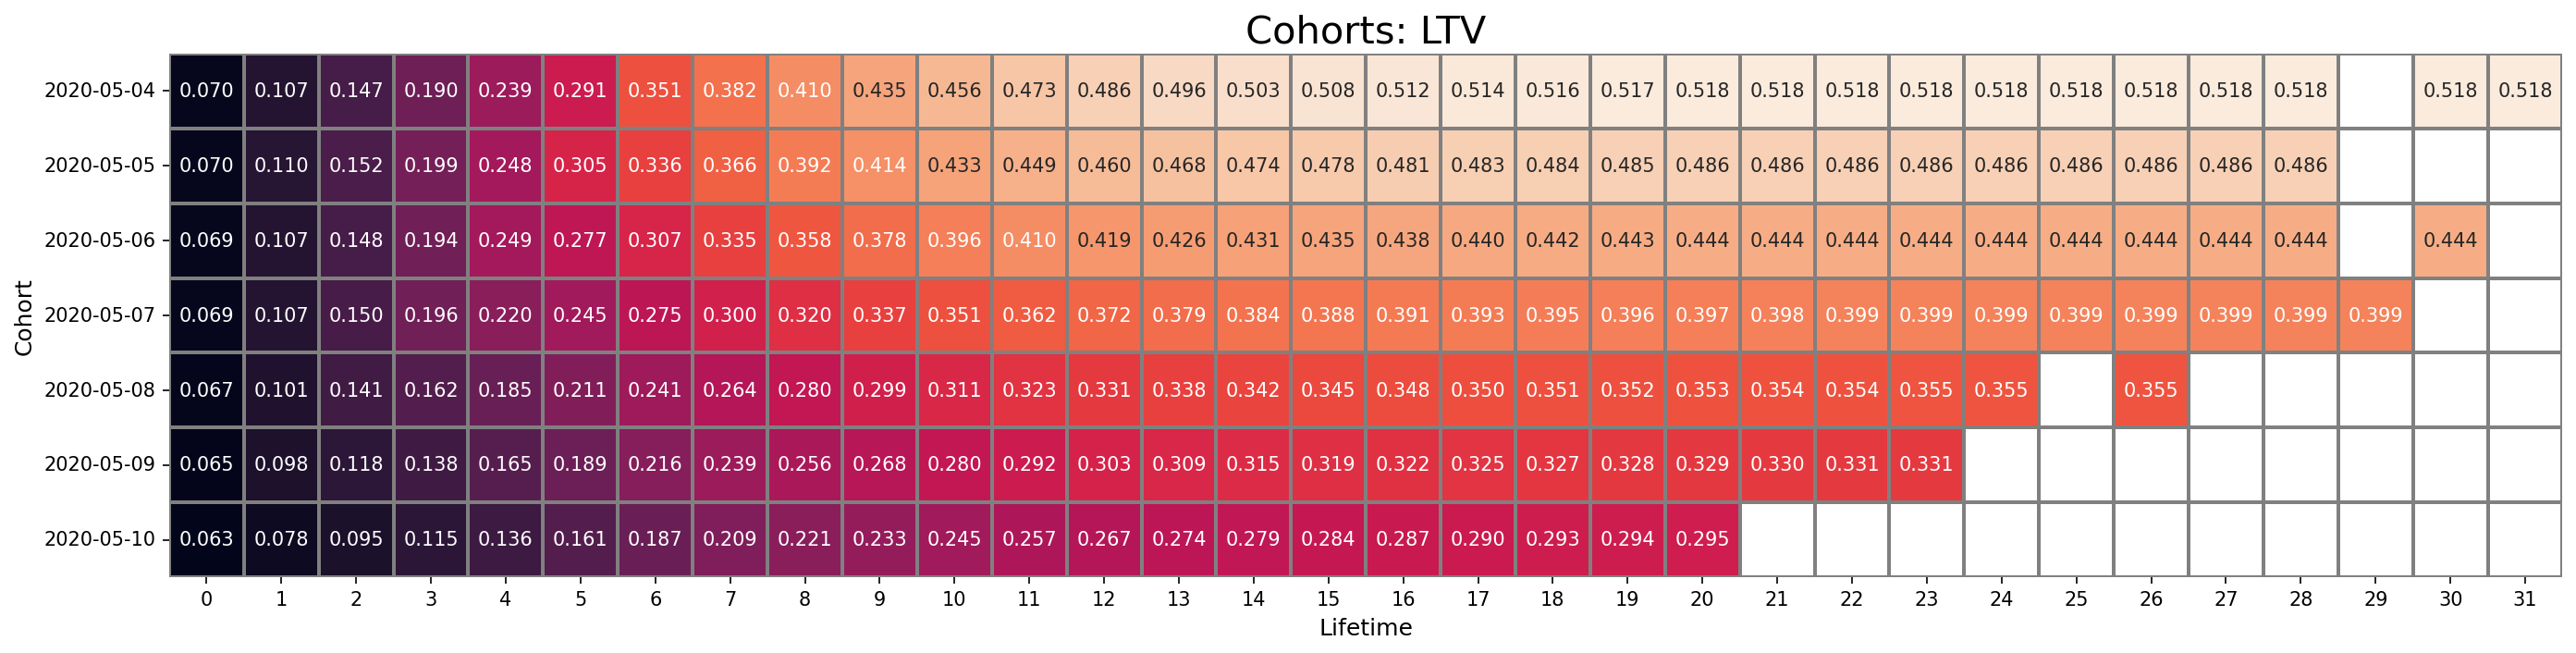

In [876]:
# находим LTV
report['ltv'] = report['gross_profit'] / report['new_purchase']

report['first_order_day'] = report['first_order_day'].dt.strftime('%Y-%m-%d')

# визуализируем когорты в сводной таблице
output = report.pivot_table(
    index='first_order_day', columns='age', values='ltv', aggfunc='mean'
).round(3)

# выводим таблицу ввиде тепловой карты
print('\033[1m' + 'LTV по всем источникам рекламы' + '\033[0m')
plt.figure(figsize=(30, 5))
plt.title('Cohorts: LTV', size=20)
ax = sns.heatmap(output.cumsum(axis=1), annot=True, fmt='.3f',
                 linewidths=1, linecolor='grey', cbar=0, square=True)
plt.xlabel('Lifetime', size=12)
plt.ylabel('Cohort', size=12)
plt.show()

Видим рост LTV, но  после 20 числа рост прекращается, и с каждой когортой показатели уменьшаются.

Видимо интерес у игроков падает из-за длительности игры или нет разнообразия в вариантах игры

facebook_ads


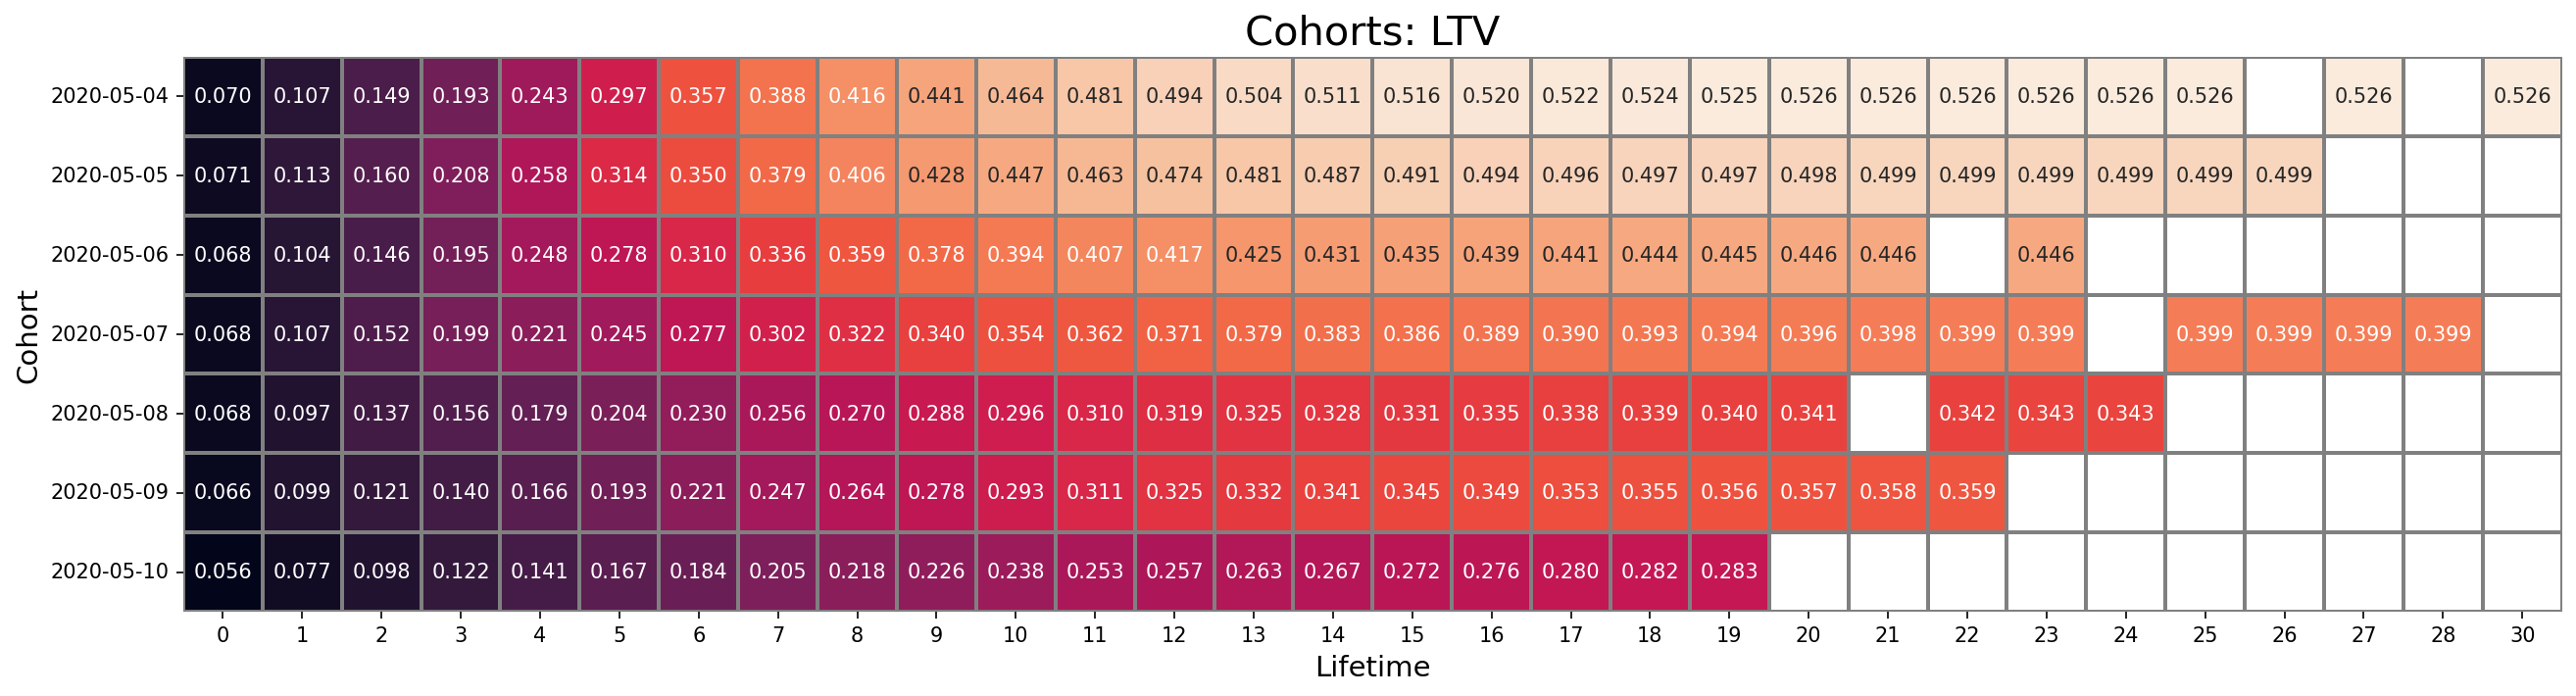

instagram_new_adverts


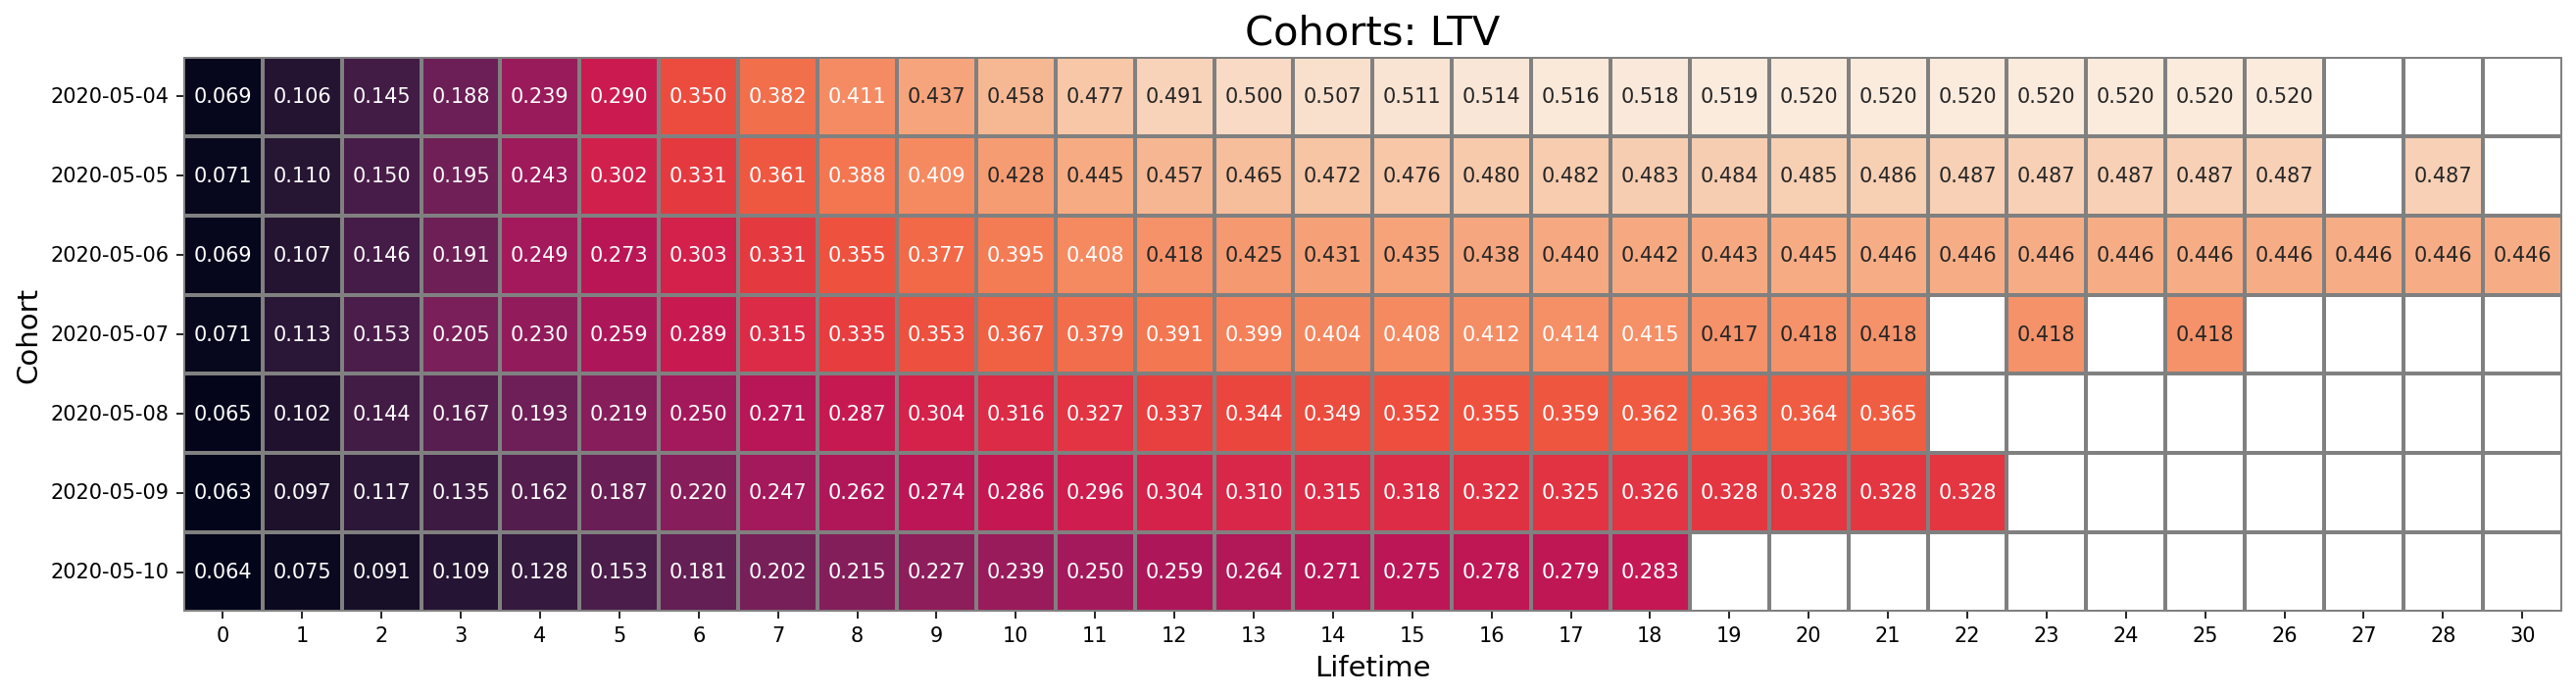

yandex_direct


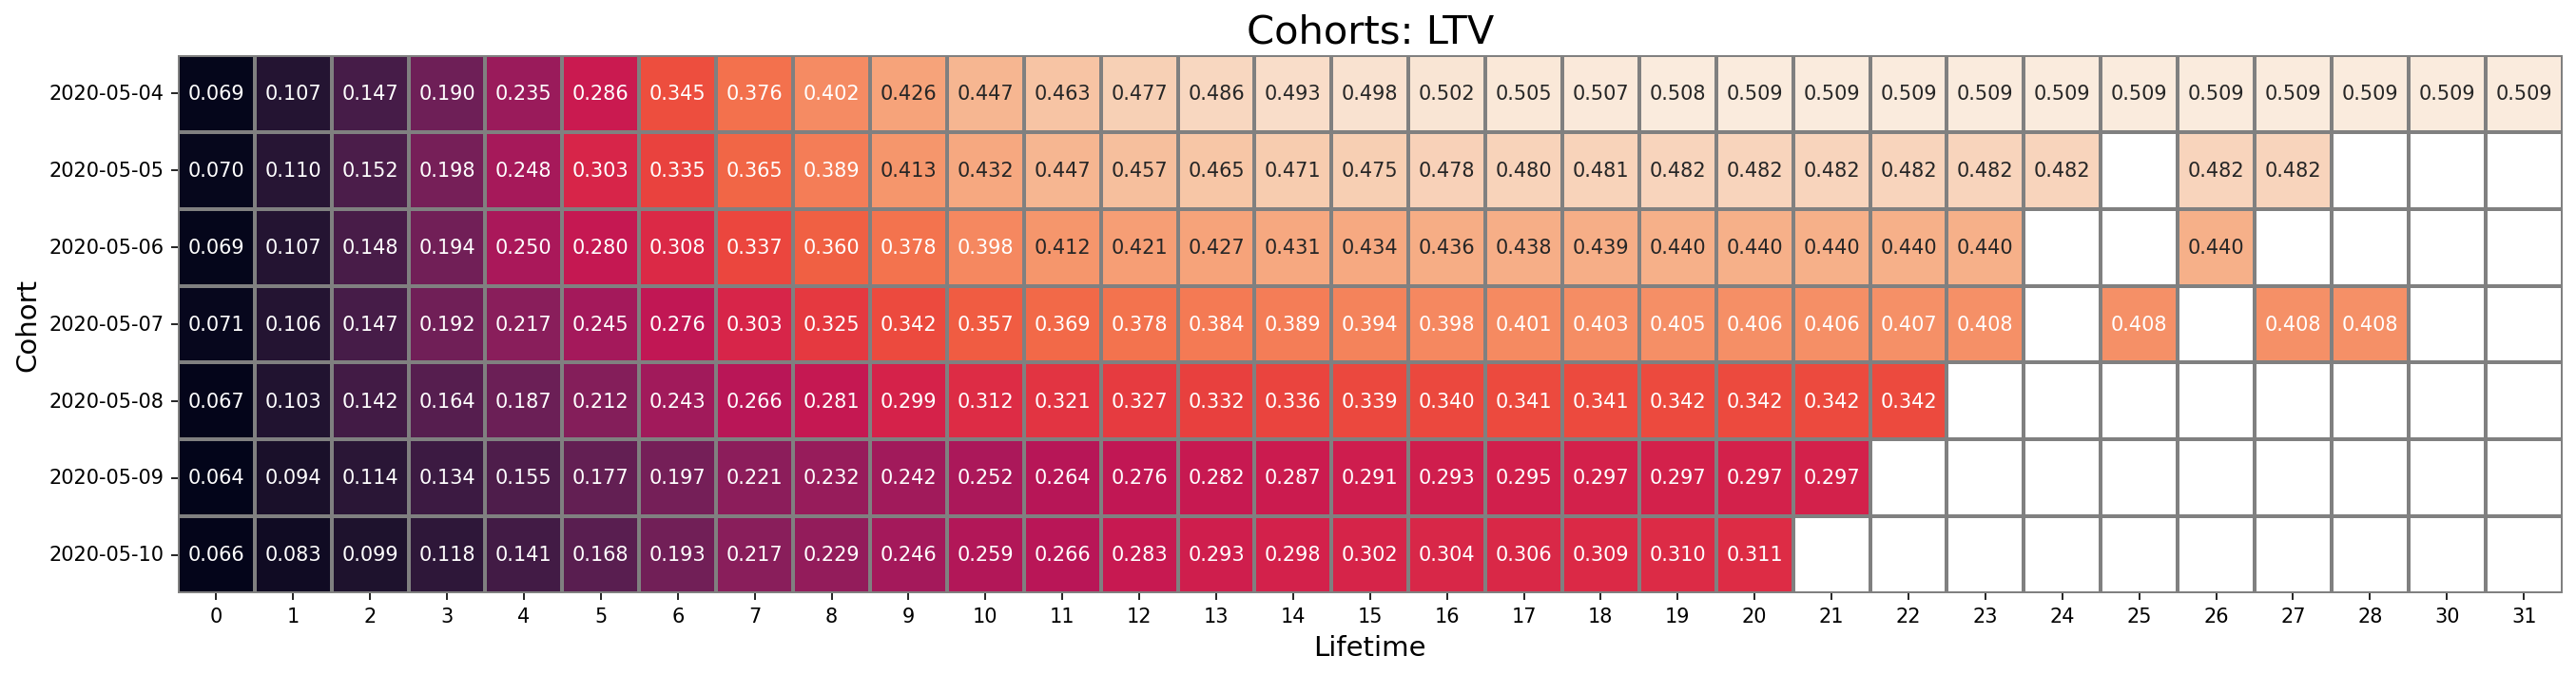

youtube_channel_reklama


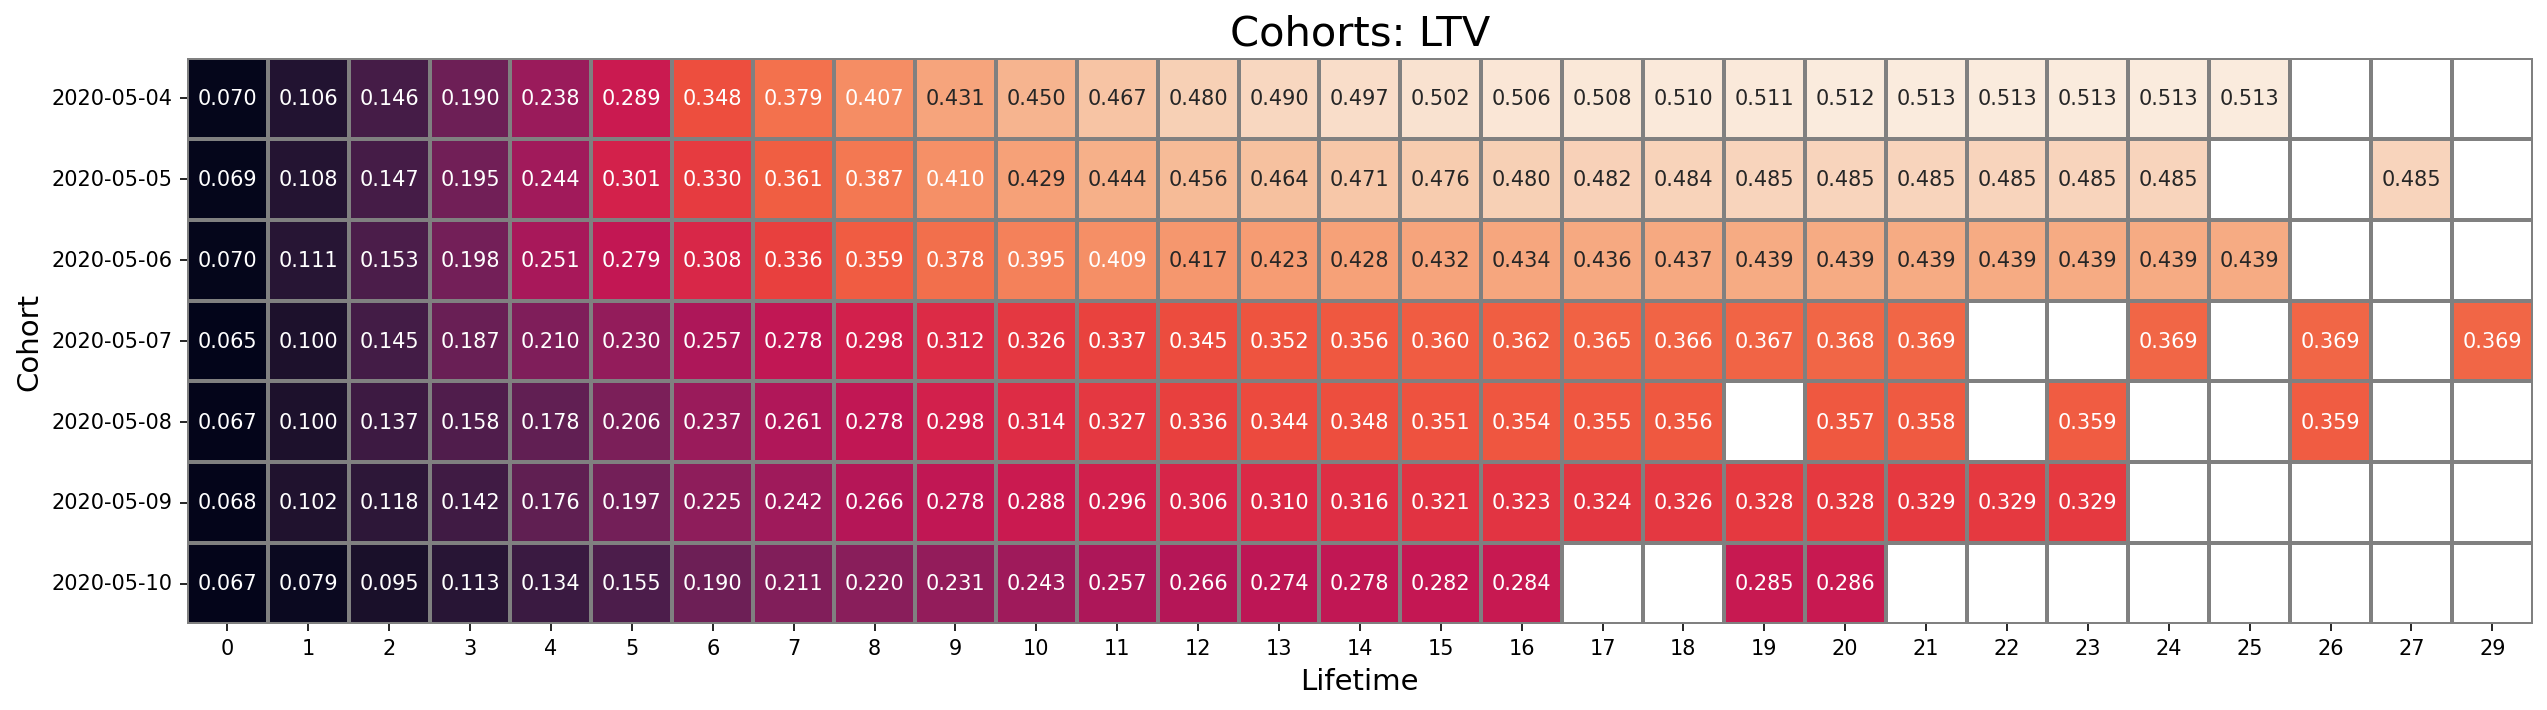

In [877]:
def ad_source(data, source):
    # визуализируем когорты в виде сводной таблицы
    output = data.pivot_table(
        index='first_order_day', columns='age', values='ltv', aggfunc='mean'
    ).round(3)
    
    # выводим сводную таблицу ввиде тепловой карты
    print('\033[1m' + source + '\033[0m')
    plt.figure(figsize=(30, 5))
    plt.title('Cohorts: LTV', size=20)
    ax = sns.heatmap(output.cumsum(axis=1), annot=True, fmt='.3f',
                     linewidths=1, linecolor='gray', cbar=0, square=True)
    plt.xlabel('Lifetime', size=14)
    plt.ylabel('Cohort', size=14)
    plt.show()

for source in report['source'].unique().tolist():
    ad_source(report[report['source'] == source], source)
   

Между источниками практически нет разницы

## Расчитаем CAC

In [878]:
# считаем расходы по дням
day_costs = ad_costs.groupby(['source', 'date']).sum().reset_index().set_index('date')
day_costs.head()

,source,cost
date,,
2020-05-03,facebook_ads,935.9
2020-05-04,facebook_ads,548.4
2020-05-05,facebook_ads,260.2
2020-05-06,facebook_ads,178.0
2020-05-07,facebook_ads,111.8


In [879]:
day_costs = day_costs.reset_index()

day_costs['date'] = day_costs['date'].dt.strftime('%Y-%m-%d')

day_costs = day_costs.set_index('date')

# добавим данные о расходах в отчёт и посчитаем CAC
report_new = pd.merge(
    report, day_costs, left_on=['source', 'first_order_day'], right_on=['source', 'date']
)
report_new['cac'] = report_new['cost'] / report_new['new_purchase']
report_new.head()  

,source,first_order_day,new_purchase,order_day,profit,gross_profit,age,ltv,cost,cac
0,facebook_ads,2020-05-04,1184,2020-05-04,82.9,82.9,0,0.1,548.4,0.5
1,facebook_ads,2020-05-04,1184,2020-05-05,43.7,43.7,1,0.0,548.4,0.5
2,facebook_ads,2020-05-04,1184,2020-05-06,49.6,49.6,2,0.0,548.4,0.5
3,facebook_ads,2020-05-04,1184,2020-05-07,51.6,51.6,3,0.0,548.4,0.5
4,facebook_ads,2020-05-04,1184,2020-05-08,59.4,59.4,4,0.1,548.4,0.5


In [880]:
# группируем по источнику
cost_by_source = ad_costs.groupby('source').agg({'cost':'sum'})

# считаем количество покупателей за весь период
buyers_by_source = (
    first_purchase.groupby('source')
    .agg({'id': 'nunique'})
    .reset_index()
)
buyers_by_source.columns = ['source', 'buyers']
buyers_by_source.head()

,source,buyers
0,facebook_ads,2726
1,instagram_new_adverts,3347
2,yandex_direct,4817
3,youtube_channel_reklama,2686


In [881]:
cac = pd.merge(
    cost_by_source, buyers_by_source, on='source')

cac['cac'] = cac['cost'] / cac['buyers']
cac

,source,cost,buyers,cac
0,facebook_ads,"2,140.9",2726,0.8
1,instagram_new_adverts,"2,161.4",3347,0.6
2,yandex_direct,"2,233.1",4817,0.5
3,youtube_channel_reklama,"1,068.1",2686,0.4


* Высокая стоимость привлечения  у `facebook_ads` - 0.8 y.e.
* Наименьшая стоимость привлечения у `youtube_channel_reklama` - 0.4 y.e.
* `yandex_direct` выделился Самым большим кол-вом привлечения при небольшой стоимости затрат - 0.5 y.e.

## Считаем ROMI

По всем источникам рекламы


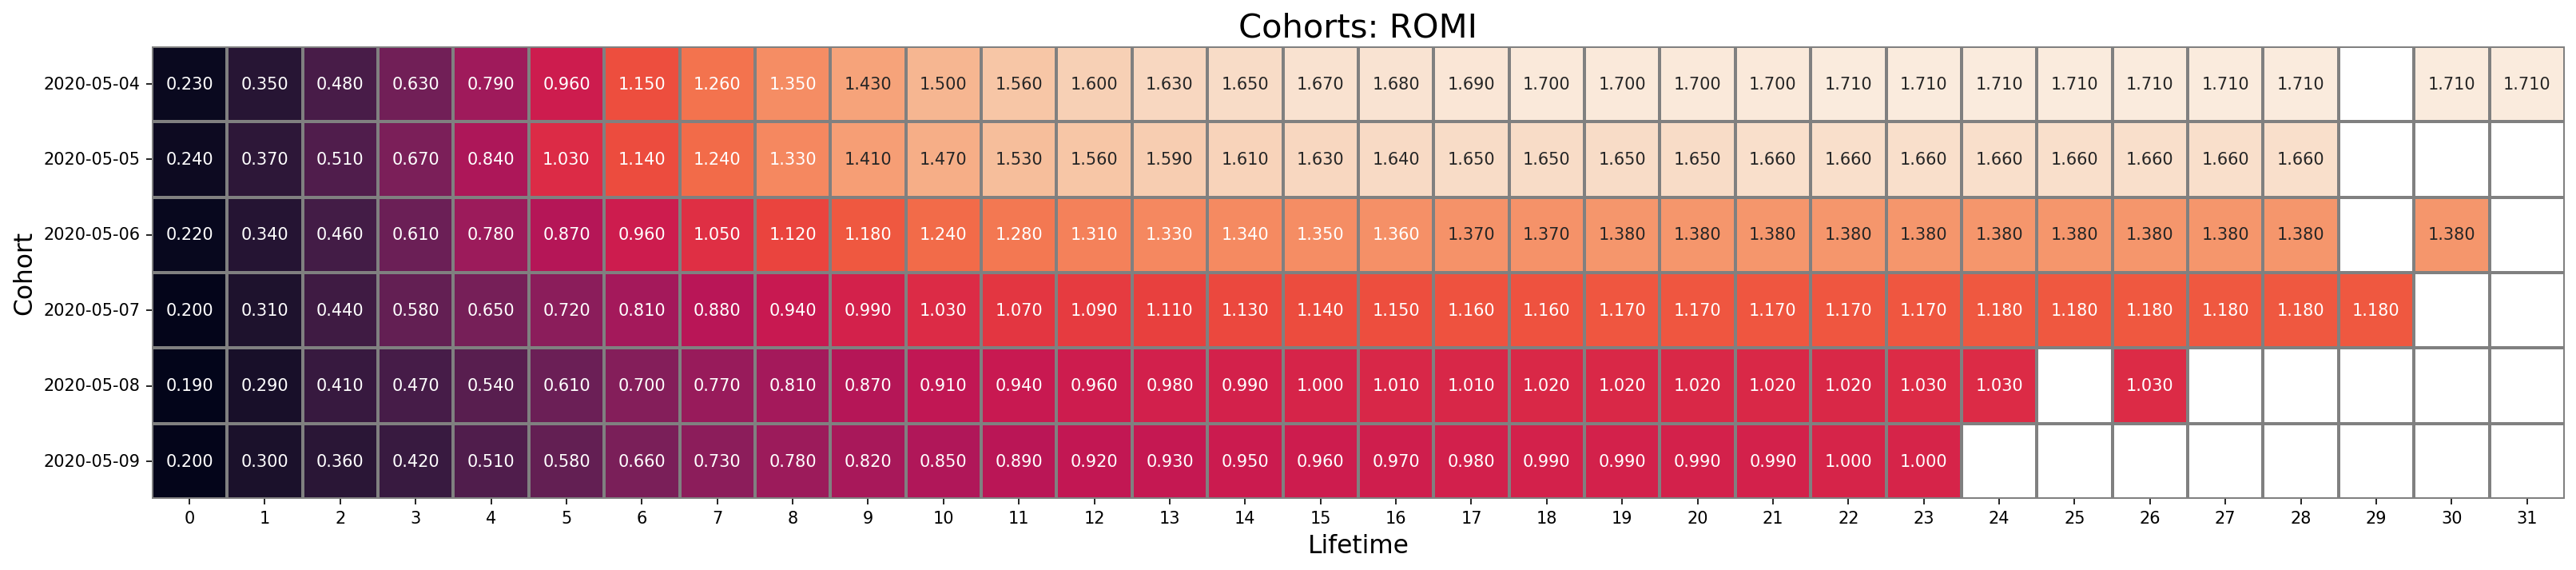

age
0    0.2
1    0.3
2    0.4
3    0.6
4    0.7
5    0.8
6    0.9
7    1.0
8    1.1
9    1.1
10   1.2
11   1.2
12   1.2
13   1.3
14   1.3
15   1.3
16   1.3
17   1.3
18   1.3
19   1.3
20   1.3
21   1.3
22   1.3
23   1.3
24   1.4
25   1.5
26   1.4
27   1.5
28   1.5
29   1.2
30   1.5
31   1.7
dtype: float64 



In [882]:
def heatmap_romi(data, source):
    # визуализируем когорты в виде сводной таблицы
    output = data.pivot_table(
        index='first_order_day', columns='age', values='romi', aggfunc='mean'
    )    
    
    # выводим сводную таблицу ввиде тепловой карты
    print('\033[1m' + source + '\033[0m')
    plt.figure(figsize=(30, 5))
    plt.title('Cohorts: ROMI', size=20)
    ax = sns.heatmap(output.cumsum(axis=1).round(2), annot=True, fmt='.3f',
                     linewidths=1, linecolor='gray', cbar=0, square=True)
    plt.xlabel('Lifetime', size=15)
    plt.ylabel('Cohort', size=15)
    plt.show()
    
    print(output.cumsum(axis=1).mean(axis=0), '\n')
    
# рассчёт ROMI
report_new['romi'] = report_new['ltv'] / report_new['cac']


# визуализируем когорты по всем источникам
output = report_new.pivot_table(
    index='first_order_day', columns='age', values='romi', aggfunc='mean'
)

heatmap_romi(report_new, 'По всем источникам рекламы')    

facebook_ads


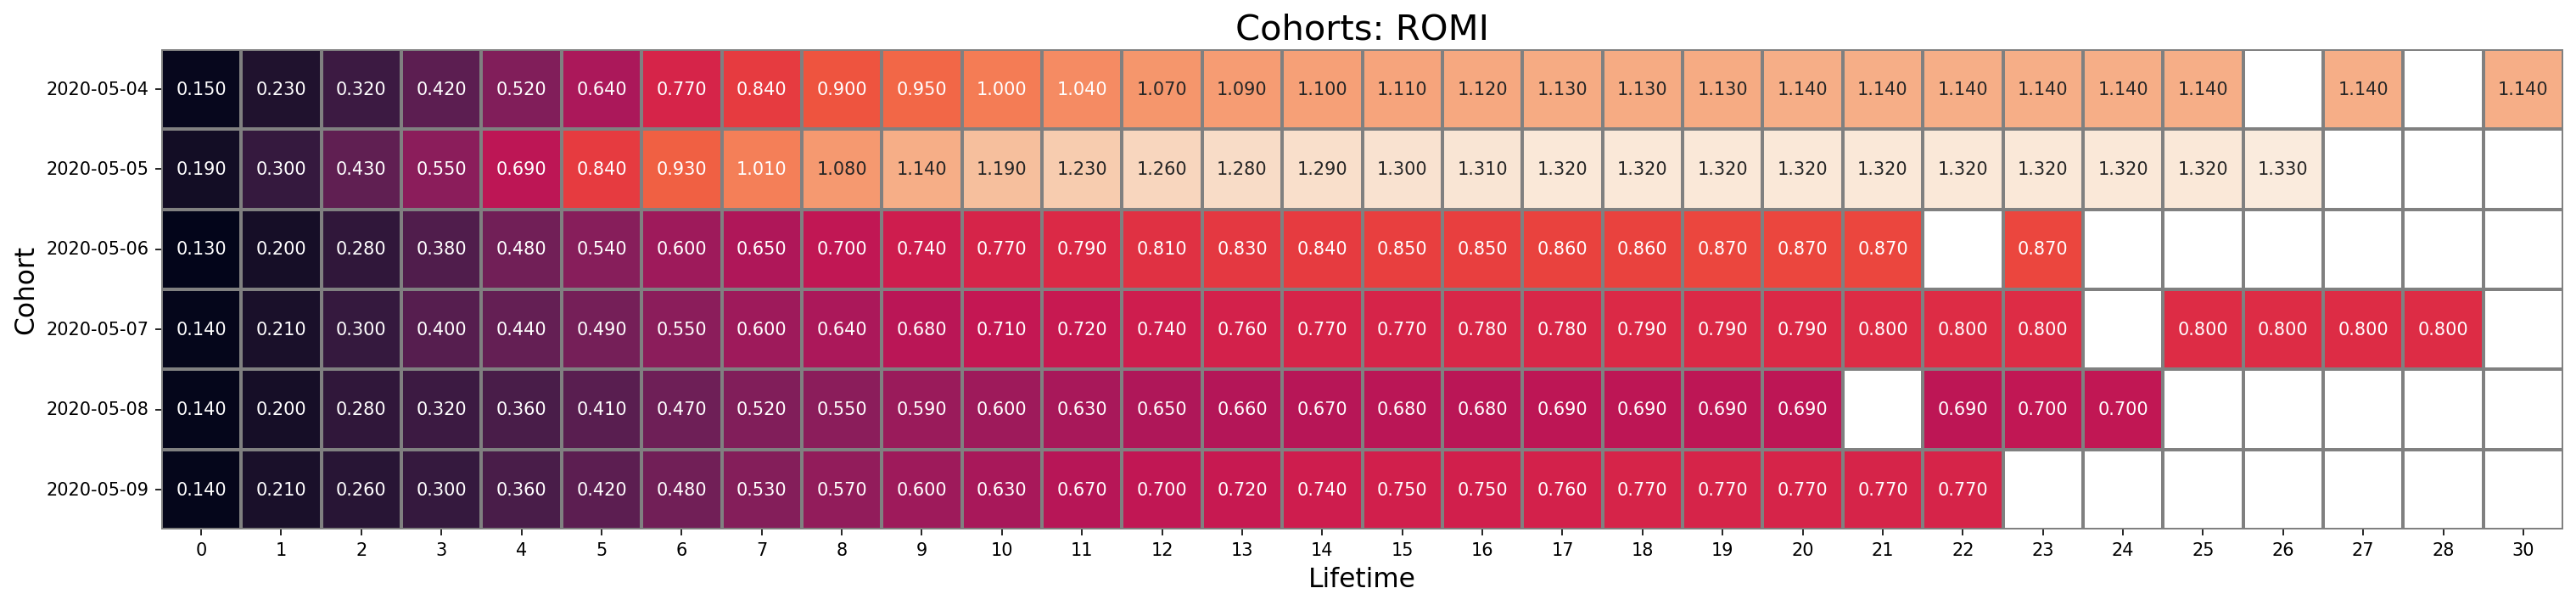

age
0    0.1
1    0.2
2    0.3
3    0.4
4    0.5
5    0.6
6    0.6
7    0.7
8    0.7
9    0.8
10   0.8
11   0.8
12   0.9
13   0.9
14   0.9
15   0.9
16   0.9
17   0.9
18   0.9
19   0.9
20   0.9
21   1.0
22   0.9
23   1.0
24   1.1
25   1.1
26   1.1
27   1.0
28   0.8
30   1.1
dtype: float64 

instagram_new_adverts


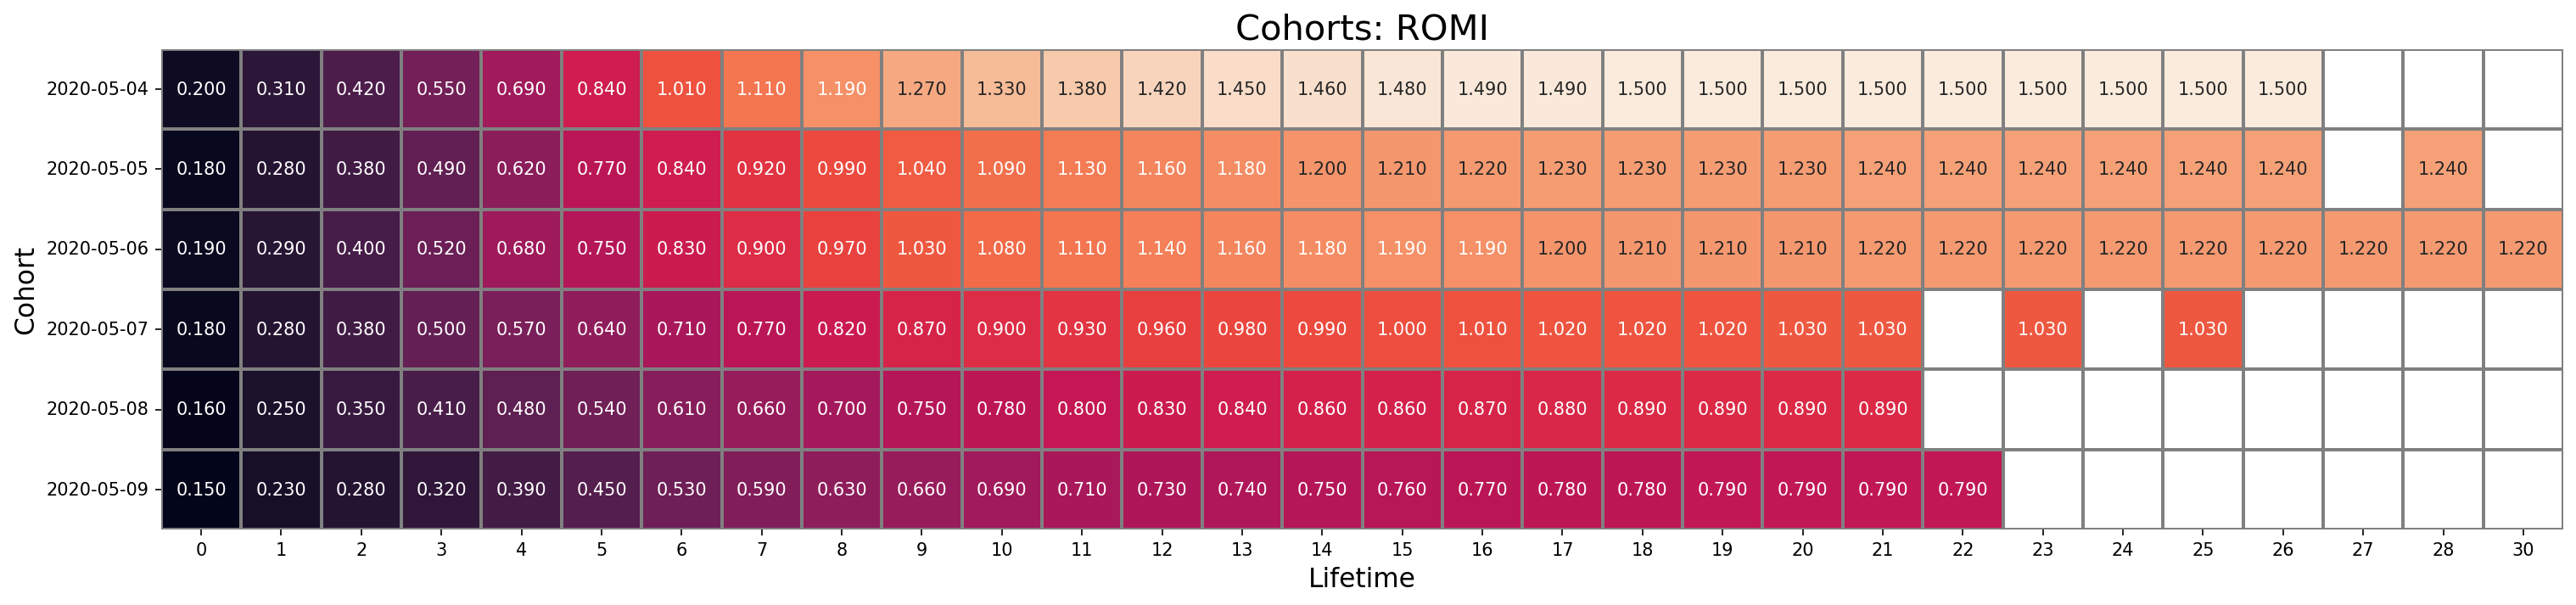

age
0    0.2
1    0.3
2    0.4
3    0.5
4    0.6
5    0.7
6    0.8
7    0.8
8    0.9
9    0.9
10   1.0
11   1.0
12   1.0
13   1.1
14   1.1
15   1.1
16   1.1
17   1.1
18   1.1
19   1.1
20   1.1
21   1.1
22   1.2
23   1.2
24   1.3
25   1.2
26   1.3
27   1.2
28   1.2
30   1.2
dtype: float64 

yandex_direct


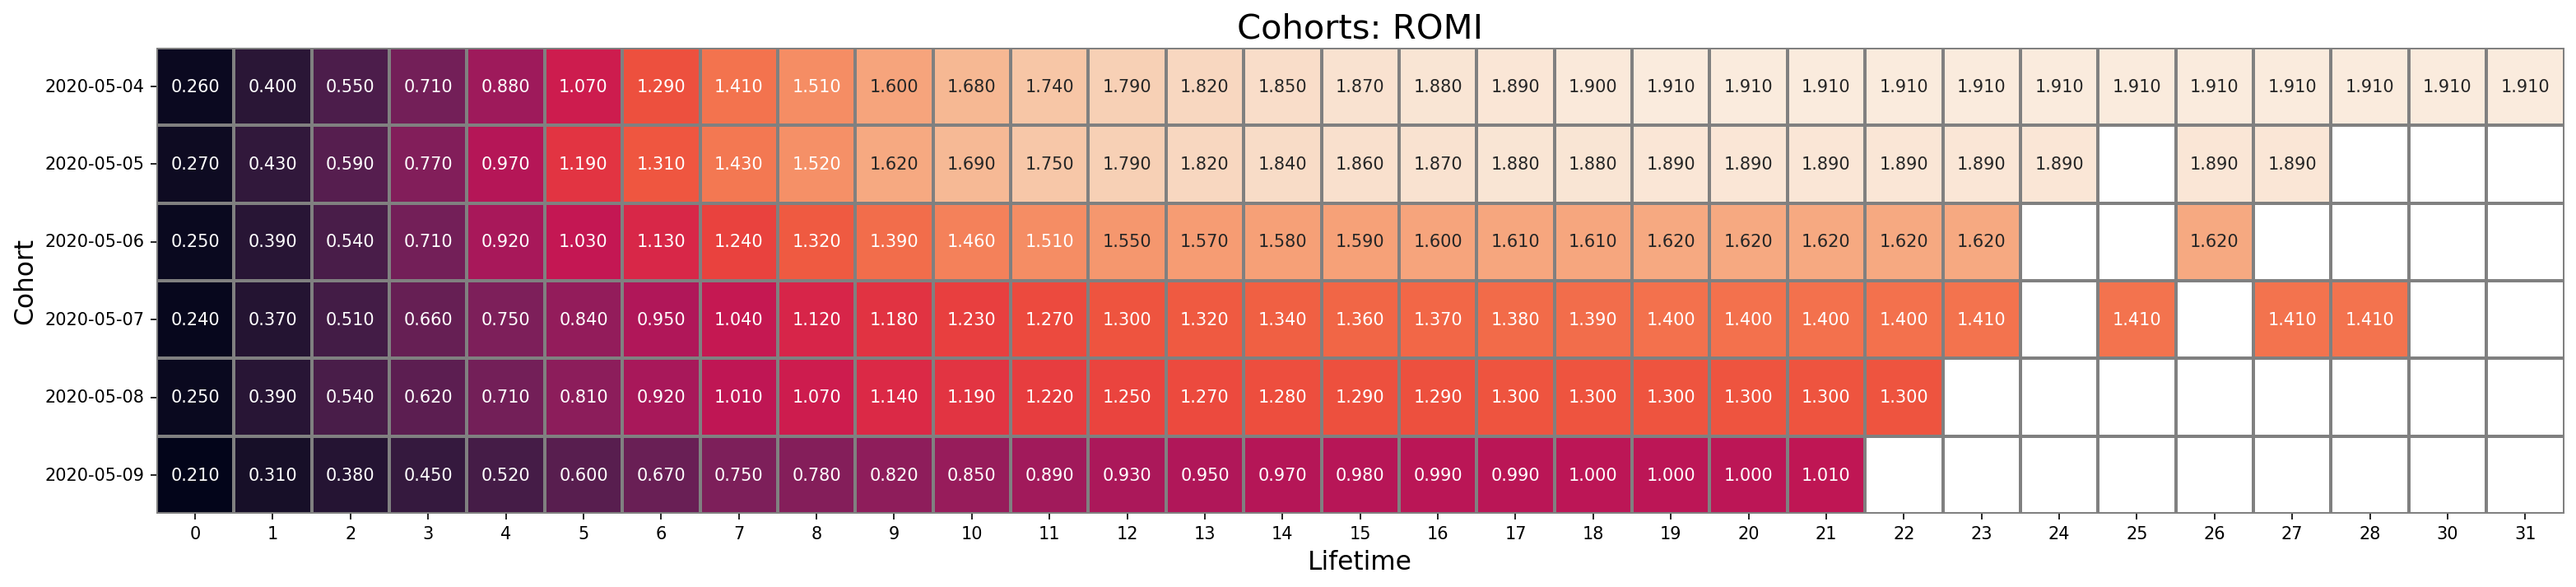

age
0    0.2
1    0.4
2    0.5
3    0.7
4    0.8
5    0.9
6    1.0
7    1.1
8    1.2
9    1.3
10   1.3
11   1.4
12   1.4
13   1.5
14   1.5
15   1.5
16   1.5
17   1.5
18   1.5
19   1.5
20   1.5
21   1.5
22   1.6
23   1.7
24   1.9
25   1.7
26   1.8
27   1.7
28   1.7
30   1.9
31   1.9
dtype: float64 

youtube_channel_reklama


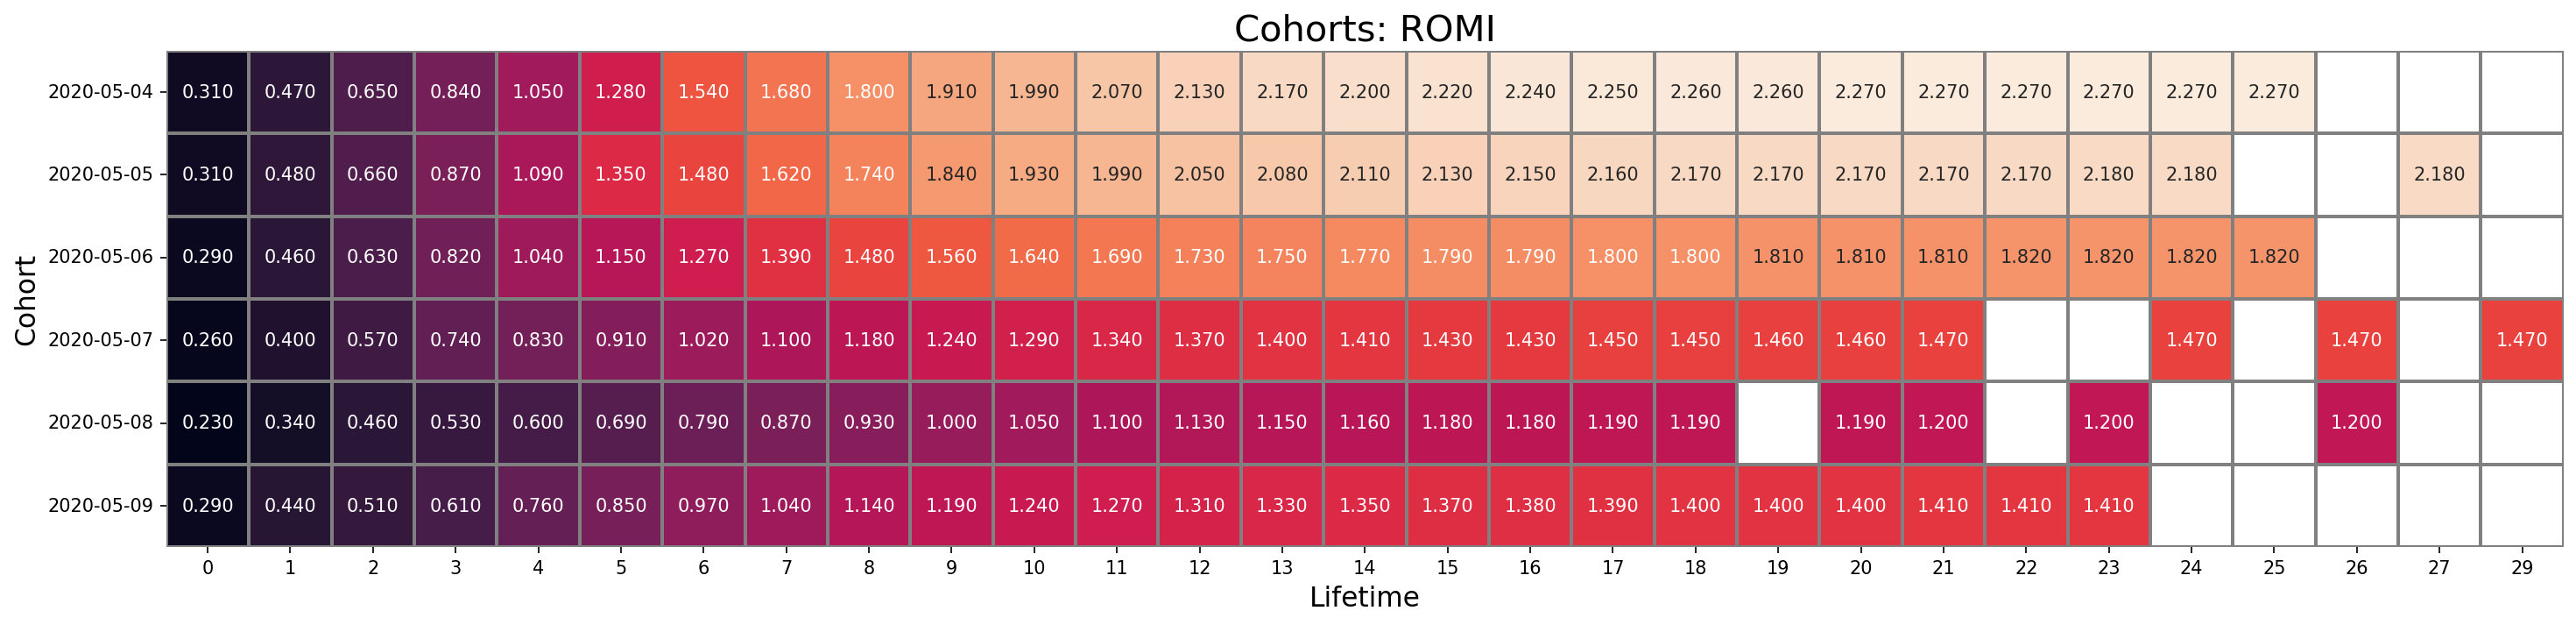

age
0    0.3
1    0.4
2    0.6
3    0.7
4    0.9
5    1.0
6    1.2
7    1.3
8    1.4
9    1.5
10   1.5
11   1.6
12   1.6
13   1.6
14   1.7
15   1.7
16   1.7
17   1.7
18   1.7
19   1.8
20   1.7
21   1.7
22   1.9
23   1.8
24   1.9
25   2.0
26   1.3
27   2.2
29   1.5
dtype: float64 



In [883]:
# визуализируем когорты по каждому источникам
for source in report_new['source'].unique().tolist():
    heatmap_romi(report_new[report_new['source'] == source], source) 

По ROMI видим:

    - `youtube_channel_reklama` окупаются на 5 месяце, 
    - `yandex_direct` на 6 месяц, 
    - `instagram_new_adverts` на 10 месяц,
    - худший показатель у `facebook_ads` на 21 месяц
    - окупаемость на 7 месяц

### Предварительный вывод:

* каждый день заходит в игру  2884.88 игроков 
* в неделю 6120 
* возвращается в игру 47.14% это хороший показатель


* рост числа игроков наблюдаем в первые 7 дней
* на 7 день - пик кол-ва игроков, чуть меньше 10 тыс


* Видим в первую неделю игроков много 13,5 тыс.
* Во вторую неделю игра  держит в районе 12 тысяч игроков
* На третью неделю начало большого оттока игроков - резкое снижение в три раза


* Sticky factor DAU/WAU в первую неделю превышает 50 %
* К четвертой неделе снижается до 24 %
* Возрастание DAU/WAU на пятой неделе, скорее всего большое влияние оказывают малые абсолютные значения


* Видим рост LTV, но  после 20 числа рост прекращается, и с каждой когортой показатели уменьшаются
* Видимо интерес у игроков падает из-за длительности игры или нет разнообразия в вариантах

По CAC видим:
* Высокая стоимость привлечения  у `facebook_ads` - 0.8 y.e.
* Наименьшая стоимость привлечения у `youtube_channel_reklama` - 0.4 y.e.
* `yandex_direct` выделился Самым большим кол-вом привлечения при небольшой стоимости затрат - 0.5 y.e.


По ROMI видим:
- `youtube_channel_reklama` окупаются на 5 месяце, 
- `yandex_direct` на 6 месяц, 
- `instagram_new_adverts` на 10 месяц,
- худший показатель у `facebook_ads` на 21 месяц
- окупаемость на 7 месяц

## Посмотрим и обработаем выбросы

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='level_passed_h', ylabel='Density'>

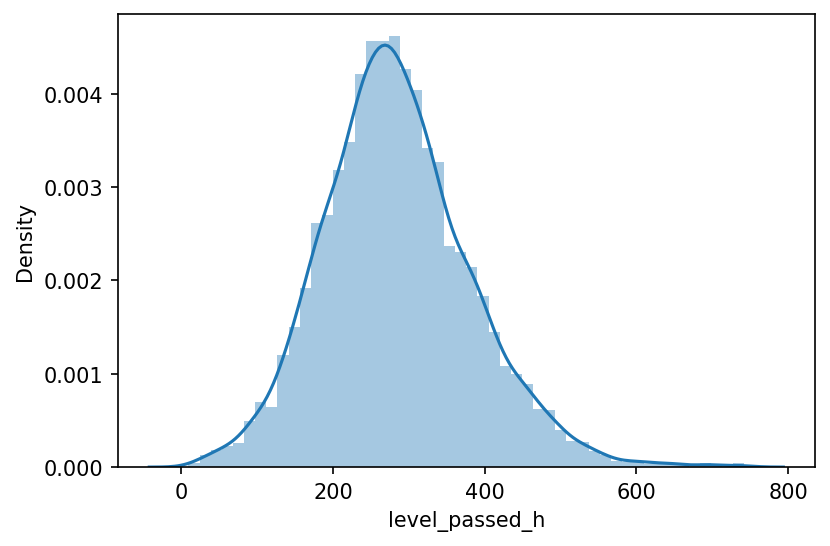

In [884]:
level_passed_finish = level_passed.copy()

level_passed_finish['level_passed_h'] = level_passed['level_passed'] / np.timedelta64(1, 'h')

sns.distplot(level_passed_finish['level_passed_h'])


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='level_passed_h'>

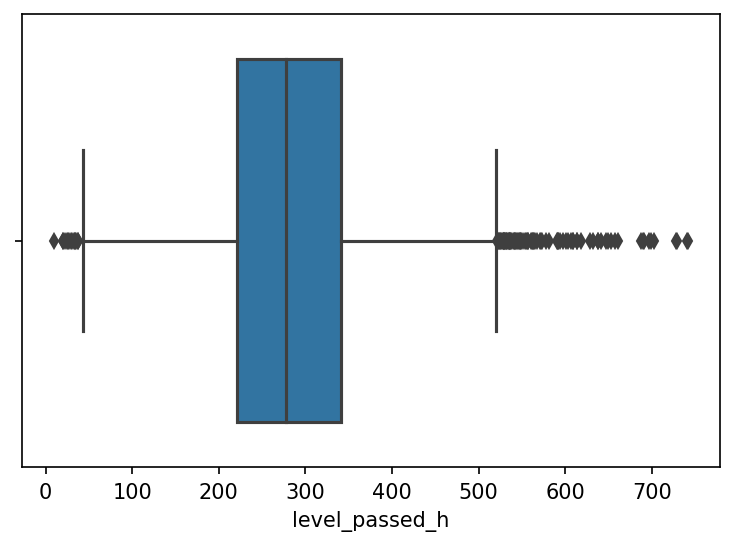

In [885]:
sns.boxplot(level_passed_finish['level_passed_h'])

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



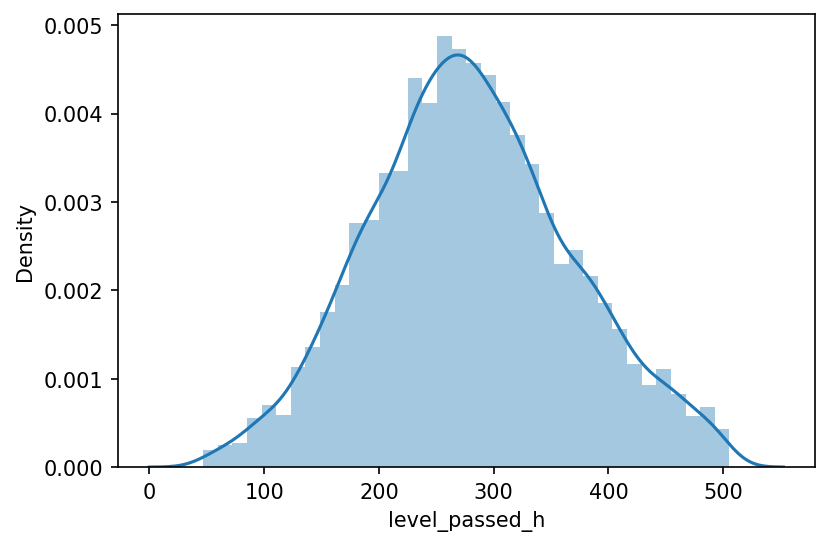

In [886]:
before = level_passed_finish['level_passed_h'].count()

level_passed_finish = level_passed_finish[level_passed_finish['level_passed_h'] < 
                                          level_passed_finish['level_passed_h'].quantile(0.98)]

level_passed_finish = level_passed_finish[level_passed_finish['level_passed_h'] > 
                                          level_passed_finish['level_passed_h'].quantile(0.004)]

sns.distplot(level_passed_finish['level_passed_h'])
plt.show()

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='level_passed_h'>

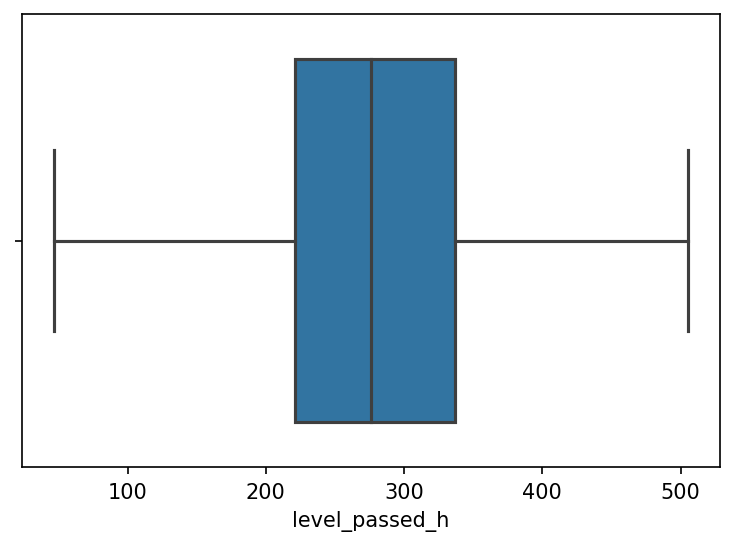

In [887]:
sns.boxplot(level_passed_finish['level_passed_h'])

In [888]:
after = level_passed_finish['level_passed_h'].count()

print('Выбросы составили: {:.2%}'.format((after / before - 1)))

Выбросы составили: -2.41%


## Проверка гипотез:

Для проверки гипотез, мы принимаем уровень статистической значимости = 0.05

In [889]:
# критический уровень статистической значимости
alpha = .05 

### Время завершения уровня различается в зависимости способа прохождения игры

* Н0: время завершения уровня не зависит от способа прохождения (среднее время через реализацию проекта в игре  РАВНО среднему времени через победу над первым игроком).
* Н1: время завершения уровня зависит от способа прохождения.(среднее время через реализацию проекта в игре НЕ РАВНО среднему времени через победу над первым игроком)

In [890]:

# получим пользователей одержавших победу через строительство
user_project = actions.query('event == "finished_stage_1"')[['user_id','event_datetime']]
                       

# получим пользователей победивших врага
user_victory = actions.query('event == "project"')[['user_id','event_datetime']]


In [891]:
# добавим данные c победителями и строителями к таблице
level_passing_user_project = level_passed_finish[['user_id',
                                                  'level_passed_h']].merge(user_project, how='left',
                                                                           on='user_id').dropna()
level_passing_time_user_victory = level_passed_finish[['user_id',
                                                     'level_passed_h']].merge(user_victory, how='left',
                                                                              on='user_id').dropna()

# разделим таблицу на 2 по типу проекта
victory_over_enemy = level_passing_time_user_victory['level_passed_h']
satellite_orbital_assembly = level_passing_user_project['level_passed_h']

victory_over_enemy

187    123.4
205    127.4
251    134.3
253    134.4
291    139.5
        ... 
5670   503.3
5671   503.4
5672   504.3
5675   505.3
5676   505.4
Name: level_passed_h, Length: 1810, dtype: float64

In [892]:
# задаем уровень статистической значимости
alpha = .05

results = st.ttest_ind(
    satellite_orbital_assembly, 
    victory_over_enemy)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print('\nСреднее значения времени прохождения уровня: \nPvP : {}\nСтроительство орбитальнойстанции : {}\nРазница : {}'
      .format(level_passing_time_user_fight['level_passed_h'].mean(),
              level_passing_time_project['level_passed_h'].mean(),
              (level_passing_time_project['level_passed_h'].mean() -
              level_passing_time_user_fight['level_passed_h'].mean())))

p-значение: 2.5062056825911873e-54
Отвергаем нулевую гипотезу

Среднее значения времени прохождения уровня: 
PvP : 315.6891246163291
Строительство орбитальнойстанции : 279.83196670776937
Разница : -35.857157908559714


### Предварительный вывод:

время завершения уровня зависит от способа прохождения

(среднее время через реализацию проекта в игре НЕ РАВНО среднему времени через победу над первым игроком)

## Кол-во построек различается в зависимости от способа прохождения
Разница кол-ва построек в зависимости способа прохождения через реализацию проекта или через победу над первым игроком должна быть проверена через гипотезу о равенстве средних двух генеральных совокупностей:

* Н0: кол-во построек не зависит от способа прохождения (среднее кол-во построек через реализацию проекта РАВНО среднему кол-ву построек через победу над первым игроком).
* Н1: кол-во построек зависит от способа прохождения уровня (среднее кол-во построек через реализацию проекта НЕ РАВНО среднему кол-ву построек через победу над первым игроком).

In [894]:
actions['building_type'].count().sum()

actions['event'].value_counts()
#actions['building_type'].value_counts()
#actions['project_type'].value_counts()

building            127956
finished_stage_1      5817
project               1866
Name: event, dtype: int64

In [895]:
# свод игроков, завершивших уровень 
user_finished_stage_1 = actions.query('event != "building"')[['user_id', 'event']]
user_finished_stage_1.set_index('user_id', inplace=True)

# определение кол-ва построек по игрокам
building_cnt = actions.pivot_table(
    index='user_id',
    columns='building_type',
    values='event_datetime',
    aggfunc='count',
)
building_cnt['total'] = building_cnt.sum(axis=1)

# распределение кол-ва построек в зависимости от условия завершения уровня
user_building_activity = user_finished_stage_1.merge(
    building_cnt,
    how="left",
    left_index=True,
    right_index=True
)

user_building_activity.head()

,event,assembly_shop,research_center,spaceport,total
user_id,,,,,
001d39dc-366c-4021-9604-6a3b9ff01e25,finished_stage_1,4.0,NaN,4.0,8.0
003ee7e8-6356-4286-a715-62f22a18d2a1,finished_stage_1,4.0,1.0,3.0,8.0
004074f8-251a-4776-922c-8348dca1a2f6,finished_stage_1,6.0,2.0,4.0,12.0
00464e5e-28ed-4be6-bf44-517ef7b3937b,finished_stage_1,4.0,NaN,4.0,8.0
0056c007-c082-43cc-bdef-afc49bca4cb9,finished_stage_1,1.0,NaN,2.0,3.0


In [898]:
# время завершения уровня через реализацию проекта
buildings_built_project = user_building_activity.query('event == "project"')['total']
# время завершения уровня через победу над первым игроком
buildings_built_victory = user_building_activity.query('event == "finished_stage_1"')['total']

In [899]:
alpha = .05 
results = st.ttest_ind(
    buildings_built_project, 
    buildings_built_victory)

print("Среднее кол-во построек до завершения уровня 1:")
print("  - Победа над врагом: {:.0f} шт.".format(buildings_built_victory.mean()))
print("  - Реализация проекта: {:.0f} шт.".format(buildings_built_project.mean()))
print()
print('p-значение: {:.3f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу. \nКол-во построек  зависит от способа прохождения.")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Кол-во построек  не зависит от способа прохождения.")


Среднее кол-во построек до завершения уровня 1:
  - Победа над врагом: 10 шт.
  - Реализация проекта: 13 шт.

p-значение: 0.000
Отвергаем нулевую гипотезу. 
Кол-во построек  зависит от способа прохождения.


### Предварительный вывод:
Кол-во построек зависит от способа прохождения уровня.

## Выводы и рекомендации

### Вывод:
* Количество событий за весь период: 135639
* `building` постройки совершили 127956 игроков (94,3 %)
* `finished_stage_1` прошли 1 уровень 5817 игроков (4,3 %)
* `project` игровой проект сделали 1866 игроков (1,04 %)


* % игроков прошедших уровень stage_1 - 42,8 %
* не прошли уровень - 57,2 %


* Кол-во завершённых проектов: 1866 шт (24,3 %)
* Большая часть игроков завершила уровень с помощью победы над врагом (75,7 %), а не через реализацию проекта


* Кол-во постороенных зданий за весь период 127956 шт.:
    - космодром 59325 шт. (46,4 %)
    - сборочный цех 54494 шт. (42,6 %)
    - исследовательский центр 14137 шт. (11 %)
    

* Возможно предположить, те игроки, кто не прошёл уровень - ушли из игры. Так как интерес снизился после 6 постройки.    
    

* Кол-во использованных источников трафика за весь период - 4


* Стоимость кликов для каждого источника трафика за весь период:
    
    -  yandex   2233.11 y.e.
    - instagram 2161.44 y.e.
    -  facebook 2140.9 y.e.
    -  youtube  1068.12 y.e.


* Кол-во пользователей пришедших с каждого источника трафика:
    -  yandex   4817
    - instagram 3347
    -  facebook 2726
    -  youtube  2686
    
    
* Самый быстрый игрок сумел завершить игру за 09:39:01
* Самое долгое  - 30 days 21:58:53
* В среднем игроки проходили уровень за 11 дней.    

* каждый день заходит в игру  2884.88 игроков 
* в неделю 6120 
* возвращается в игру 47.14% это хороший показатель


* рост числа игроков наблюдаем в первые 7 дней
* на 7 день - пик кол-ва игроков, чуть меньше 10 тыс


* Видим в первую неделю игроков много 13,5 тыс.
* Во вторую неделю игра  держит в районе 12 тысяч игроков
* На третью неделю начало большого оттока игроков - резкое снижение в три раза


* Sticky factor DAU/WAU в первую неделю превышает 50 %
* К четвертой неделе снижается до 24 %
* Возрастание DAU/WAU на пятой неделе, скорее всего большое влияние оказывают малые абсолютные значения


* Видим рост LTV, но  после 20 числа рост прекращается, и с каждой когортой показатели уменьшаются
* Видимо интерес у игроков падает из-за длительности игры или нет разнообразия в вариантах

По CAC видим:
* Высокая стоимость привлечения  у `facebook_ads` - 0.8 y.e.
* Наименьшая стоимость привлечения у `youtube_channel_reklama` - 0.4 y.e.
* `yandex_direct` выделился Самым большим кол-вом привлечения при небольшой стоимости затрат - 0.5 y.e.


По ROMI видим:
- `youtube_channel_reklama` окупаются на 5 месяце, 
- `yandex_direct` на 6 месяц, 
- `instagram_new_adverts` на 10 месяц,
- худший показатель у `facebook_ads` на 21 месяц
- окупаемость на 7 месяц


### Рекомендации:
1. Все источники рекламы обеспечивают приток игроков, лидеры  для хорошего притока и быстрой окупаемости  это `youtube_channel_reklama`, `yandex_direct`.


2. Сократить ВРЕМЯ ПРОХОЖДЕНИЯ УРОВНЯ, даже самый быстрый игрок проходит его больше 9 часов 


3. Вероятно, что баланс построек для завершение уровня 1 не выдержан. Игроки обходят систему прокачки и покупки зданий через победу над врагом. Нужно сбалансировать игровую систему до введения монетизации


4. Чтобы увеличения прибыль, нужно повысить интерес игроков - сделать разнообразней постройки в игре, создать бонусы за постройки. Это приведёт к увеличению посещаемости и времени нахождения в игре, что автоматически увеличит показы рекламы. 


